In [269]:
# Importing the required libraries
import numpy as np
import pandas as pd
import ydata_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [270]:
# Read data
dataset= pd.read_csv('avocado23.csv')

In [271]:
dataset.head()

Date  AveragePrice  TotalVolume    plu4046    plu4225  plu4770  \
0  06-01-2020      1.155100    161726.12    3737.00  140642.19   184.16   
1  06-01-2020      1.761236      1633.37      18.50     163.61     0.00   
2  06-01-2020      0.941880    714246.17  314827.55   31986.58  2757.78   
3  06-01-2020      1.596240     22687.37      89.46    3203.55     0.00   
4  06-01-2020      1.194204    898091.79  106374.09  461193.66  5850.88   

   TotalBags          type               region  
0   10996.65  conventional               Albany  
1    1347.56       organic               Albany  
2   88049.73  conventional              Atlanta  
3    5495.77       organic              Atlanta  
4  247747.75  conventional  BaltimoreWashington

In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24190 entries, 0 to 24189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24190 non-null  object 
 1   AveragePrice  24190 non-null  float64
 2   TotalVolume   24190 non-null  float64
 3   plu4046       24190 non-null  float64
 4   plu4225       24190 non-null  float64
 5   plu4770       24190 non-null  float64
 6   TotalBags     24190 non-null  float64
 7   type          24190 non-null  object 
 8   region        24190 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.7+ MB


In [273]:
dataset.isnull().any()

Date            False
AveragePrice    False
TotalVolume     False
plu4046         False
plu4225         False
plu4770         False
TotalBags       False
type            False
region          False
dtype: bool

In [274]:
dataset.describe()

AveragePrice   TotalVolume       plu4046       plu4225       plu4770  \
count  24190.000000  2.419000e+04  2.419000e+04  2.419000e+04  2.419000e+04   
mean       1.415947  9.253225e+05  3.211659e+05  1.777124e+05  2.053826e+04   
std        0.385373  3.756965e+06  1.403438e+06  7.649407e+05  1.116286e+05   
min        0.555303  1.426500e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.102471  2.150162e+04  7.108075e+02  1.704850e+03  0.000000e+00   
50%        1.380394  1.323493e+05  2.113474e+04  1.342219e+04  3.849000e+01   
75%        1.679840  4.974953e+05  1.489676e+05  7.399491e+04  2.181892e+03   
max        3.440830  5.454812e+07  2.544720e+07  1.403321e+07  2.860025e+06   

          TotalBags  
count  2.419000e+04  
mean   2.441912e+05  
std    9.371934e+05  
min    0.000000e+00  
25%    1.146995e+04  
50%    4.183803e+04  
75%    1.348499e+05  
max    1.299919e+07

In [275]:
dataset = dataset.rename(columns={'TotalVolume': 'Total_volume' , 'plu4046' : 'Small_Hass', 'plu4225': 'Large_Hass', 'plu4770' : 'Extra_large_hass', 'TotalBags':'Total_bags'})

In [276]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

In [277]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [278]:
dataset['month'] = dataset['Date'].dt.month
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset['Year'] = dataset['Date'].dt.year

In [279]:
# Total Volume = plu4046 + plu4225 + plu4770 + Total Bags

In [280]:
dataset.columns

Index(['Date', 'AveragePrice', 'Total_volume', 'Small_Hass', 'Large_Hass',
       'Extra_large_hass', 'Total_bags', 'type', 'region', 'month', 'Day',
       'Year'],
      dtype='object')

In [281]:
dataset.head(2)

Date  AveragePrice  Total_volume  Small_Hass  Large_Hass  \
0 2020-01-06      1.155100     161726.12      3737.0   140642.19   
1 2020-01-06      1.761236       1633.37        18.5      163.61   

   Extra_large_hass  Total_bags          type  region  month  Day  Year  
0            184.16    10996.65  conventional  Albany      1    6  2020  
1              0.00     1347.56       organic  Albany      1    6  2020

In [282]:
dataset.describe(include='O') #to include object dtypes

type  region
count          24190   24190
unique             2      60
top     conventional  Albany
freq           12095     410

In [159]:
dataset.groupby('Year')['type'].value_counts()

Year  type        
2020  conventional    3068
      organic         3068
2021  conventional    3068
      organic         3068
2022  conventional    3068
      organic         3068
2023  conventional    2891
      organic         2891
Name: count, dtype: int64

In [160]:
dataset.groupby('Year')['AveragePrice'].mean()

Year
2020    1.392599
2021    1.379135
2022    1.544521
2023    1.343346
Name: AveragePrice, dtype: float64

In [161]:
dataset.groupby('Year')['Total_volume'].mean()

Year
2020    981043.561276
2021    937913.771035
2022    862309.385914
2023    919698.863407
Name: Total_volume, dtype: float64

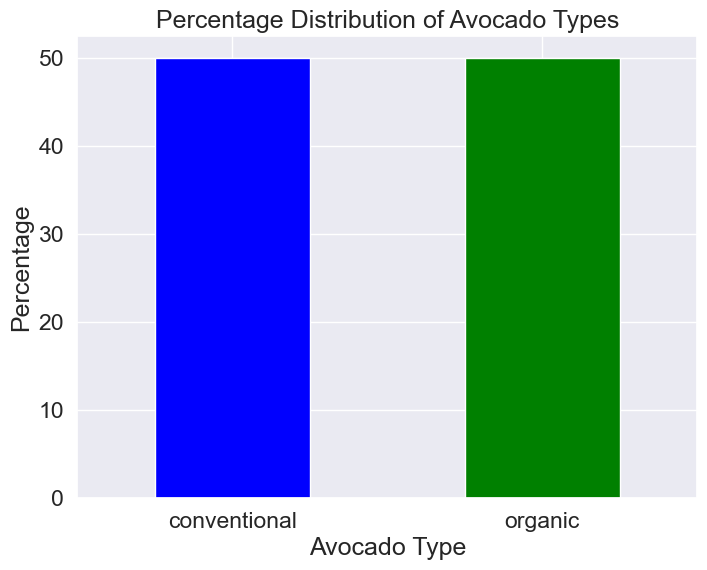

In [162]:
types_percentage = (dataset['type'].value_counts() / len(dataset)) * 100

# Plotting the distribution using a bar plot
plt.figure(figsize=(8, 6))
types_percentage.plot(kind='bar',color=['blue', 'green'])
plt.title('Percentage Distribution of Avocado Types')
plt.xlabel('Avocado Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


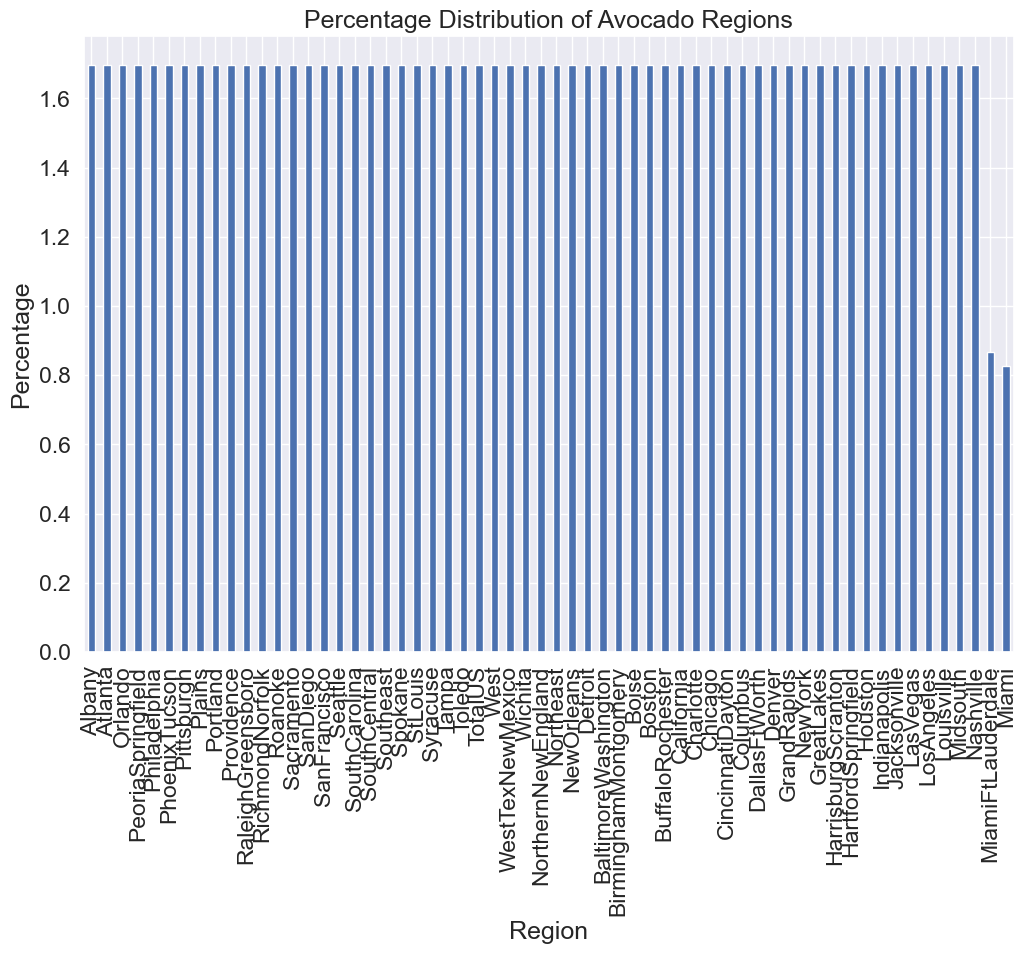

In [163]:

region_percentage = (dataset['region'].value_counts() / len(dataset)) * 100

# Plotting the distribution using a bar plot
plt.figure(figsize=(12, 8))
region_percentage.plot(kind='bar')
plt.title('Percentage Distribution of Avocado Regions')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [164]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Group by 'Date' and calculate mean of 'AveragePrice'
avocado_clean = dataset.groupby('Date')['AveragePrice'].mean().reset_index()

# Sort by 'Date'
avocado_clean = avocado_clean.sort_values('Date')

# Display the resulting DataFrame
avocado_clean.head(5)

Date  AveragePrice
0 2020-01-06      1.285058
1 2020-01-12      1.309097
2 2020-01-19      1.274901
3 2020-01-26      1.354634
4 2020-02-02      1.238023

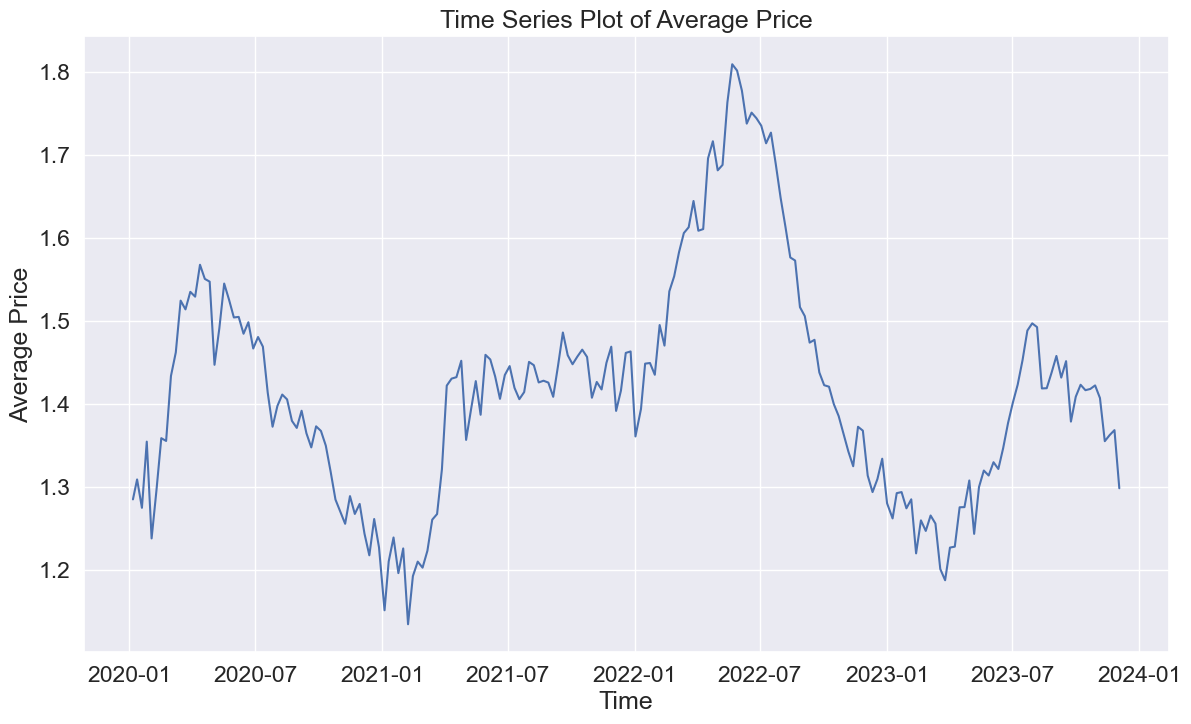

In [165]:
# Plot the time series
plt.figure(figsize=(14, 8))
plt.plot(avocado_clean['Date'],avocado_clean['AveragePrice'])
plt.title('Time Series Plot of Average Price')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.show()

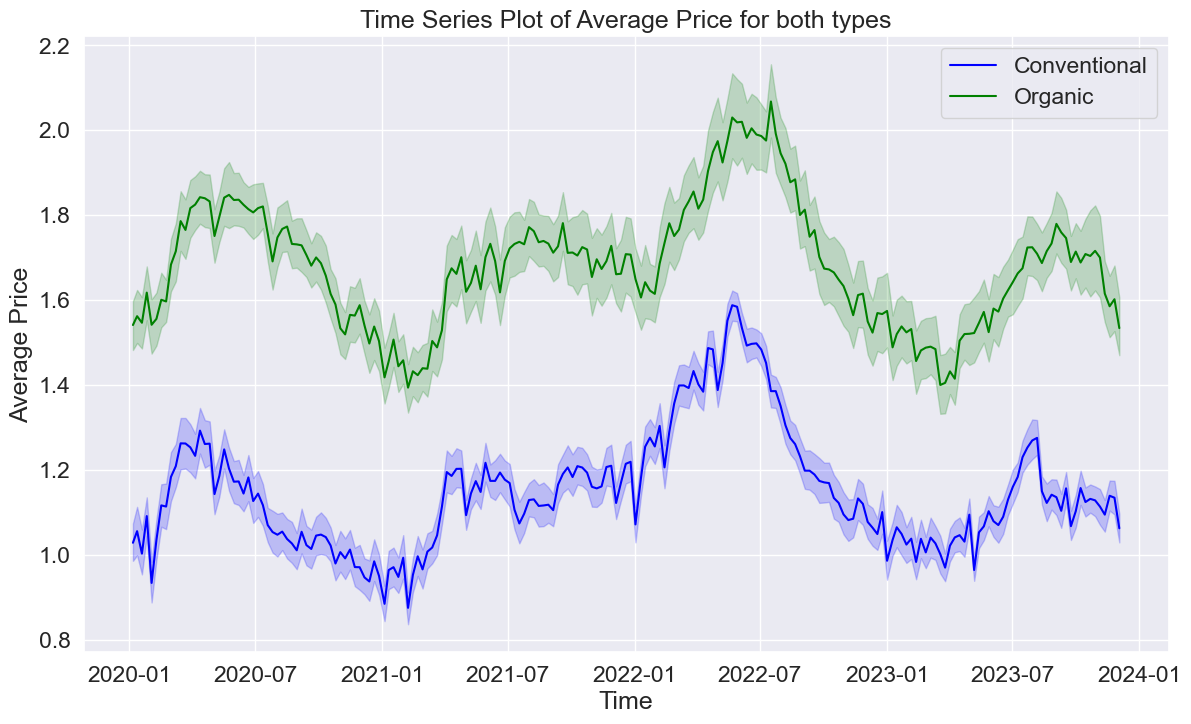

In [166]:

plt.figure(figsize=(14, 8))

# Filter data for conventional avocados
conventional_data = dataset[dataset['type'] == 'conventional']

# Filter data for organic avocados
organic_data = dataset[dataset['type'] == 'organic']

# Plot time series for conventional avocados
sns.lineplot(x=conventional_data['Date'], y=conventional_data['AveragePrice'], label='Conventional', color='blue')

# Plot time series for organic avocados
sns.lineplot(x=organic_data['Date'], y=organic_data['AveragePrice'], label='Organic', color='green')

plt.title('Time Series Plot of Average Price for both types')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend()  # Show legend to differentiate between the two types
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Average price per year')

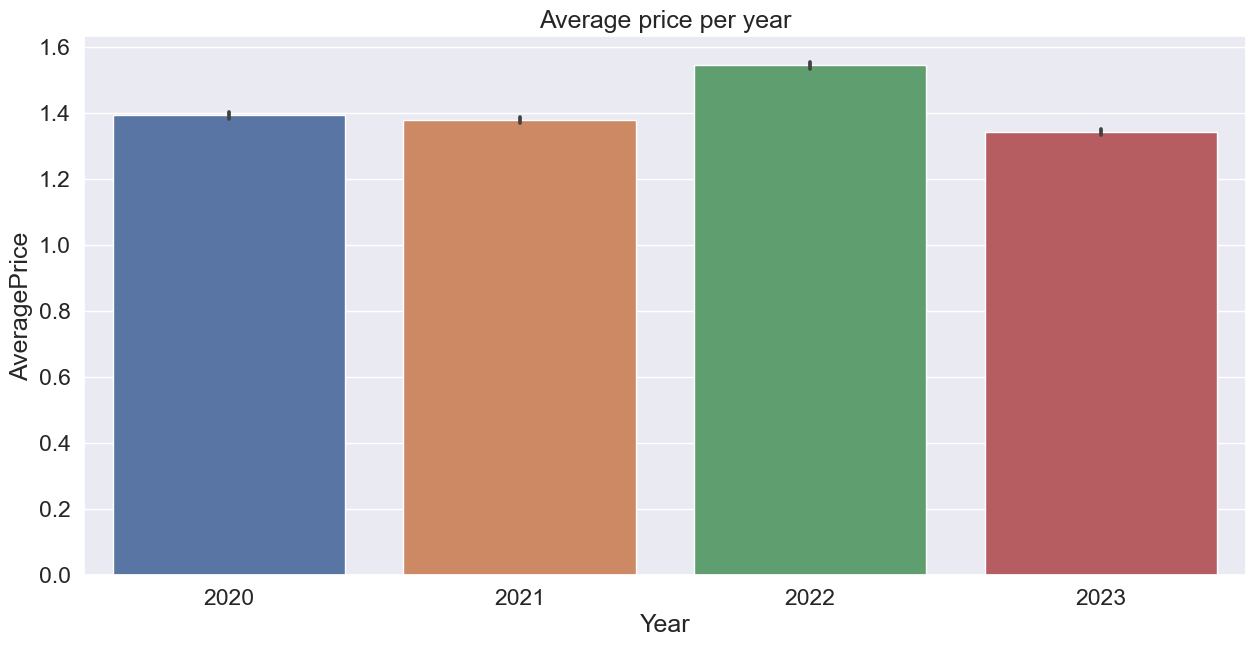

In [167]:
sns.barplot(x='Year', y='AveragePrice', data=dataset)
plt.title('Average price per year')

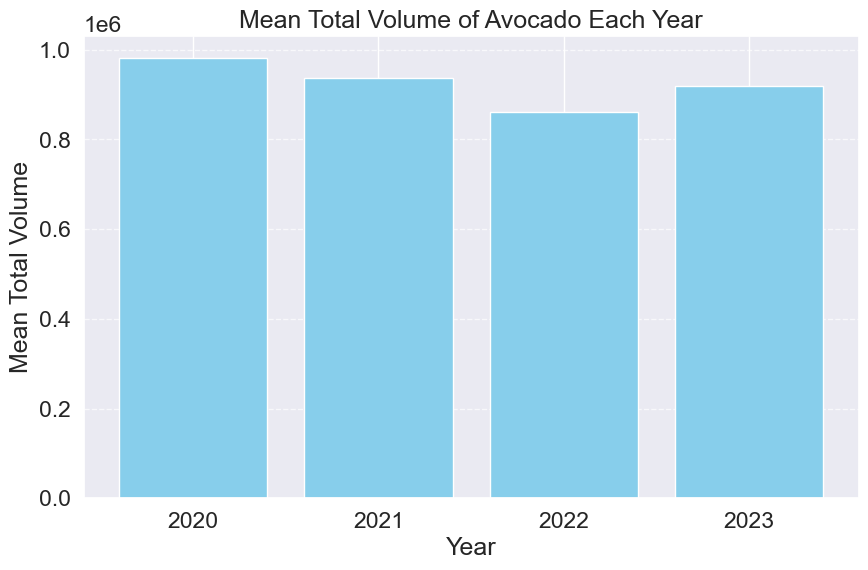

In [168]:
mean_volume_by_year = dataset.groupby('Year')['Total_volume'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_volume_by_year['Year'], mean_volume_by_year['Total_volume'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean Total Volume')
plt.title('Mean Total Volume of Avocado Each Year')
plt.xticks(mean_volume_by_year['Year'])  # Set x-axis ticks to be the years
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Text(0.5, 1.0, 'Total volume sold per year')

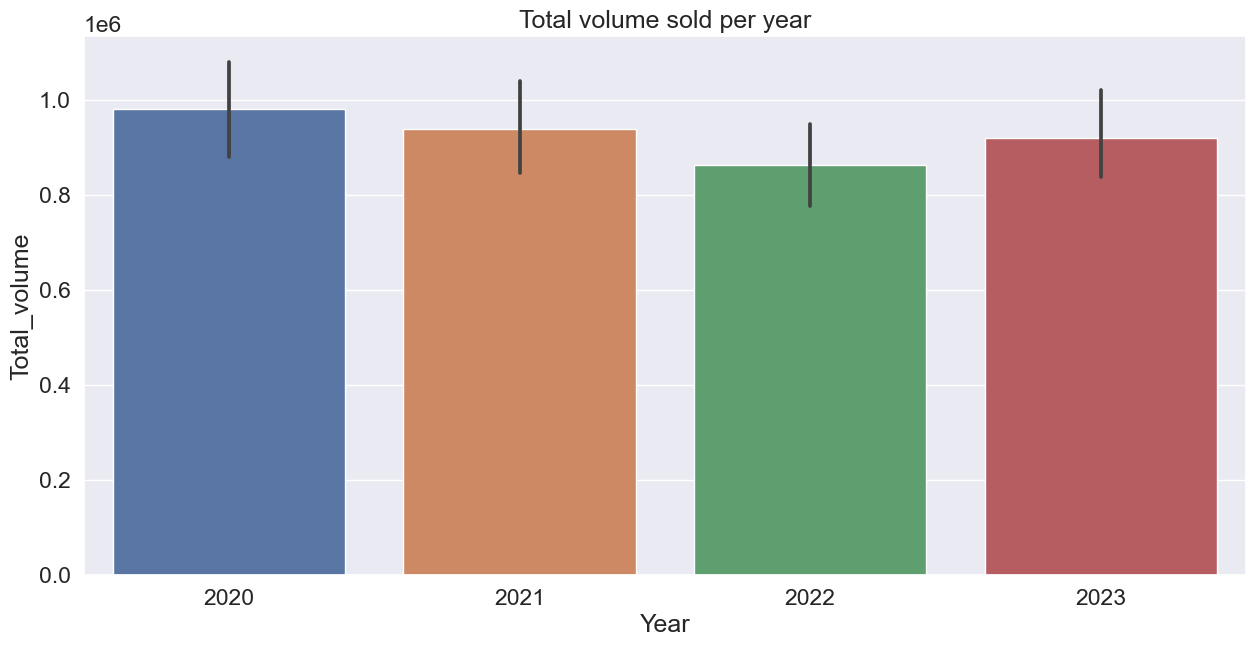

In [169]:
sns.barplot(x='Year', y='Total_volume', data=dataset)
plt.title('Total volume sold per year')

Text(0.5, 1.0, 'Average price per month')

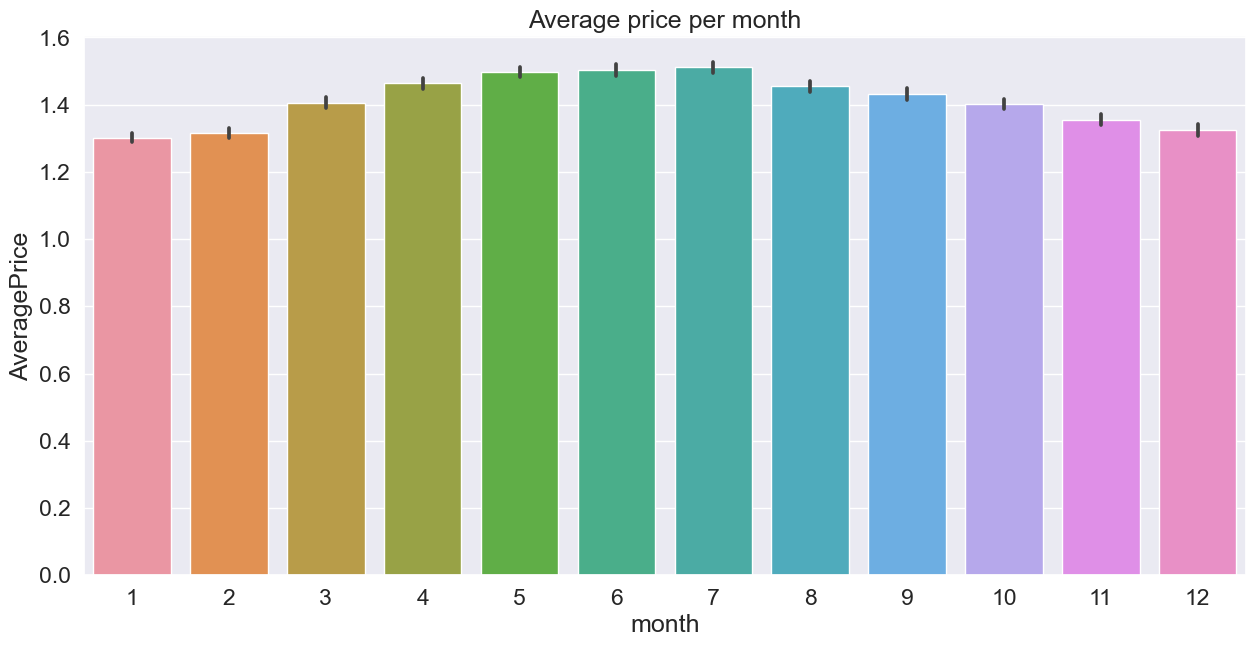

In [170]:
sns.barplot(x='month', y='AveragePrice', data=dataset)
plt.title('Average price per month')

Text(0.5, 1.0, 'Total Volume per month')

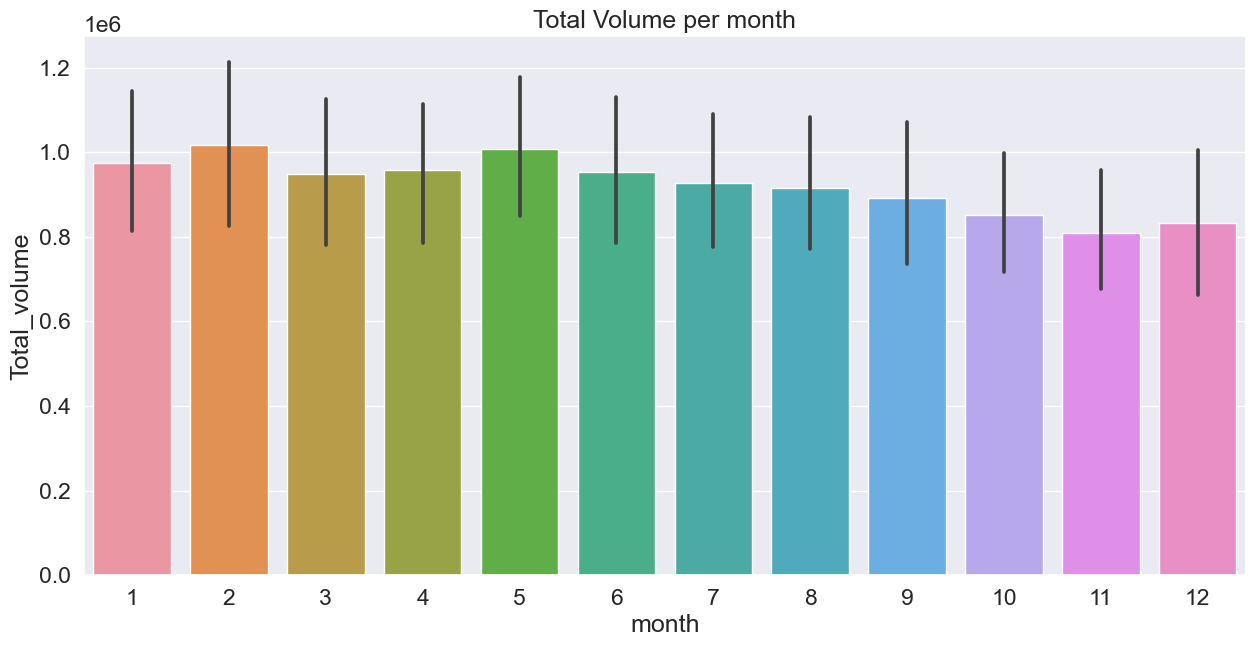

In [283]:
sns.barplot(x='month', y='Total_volume', data=dataset)
plt.title('Total Volume per month')

Text(0.5, 1.0, 'Average price of conventional type vs organic type')

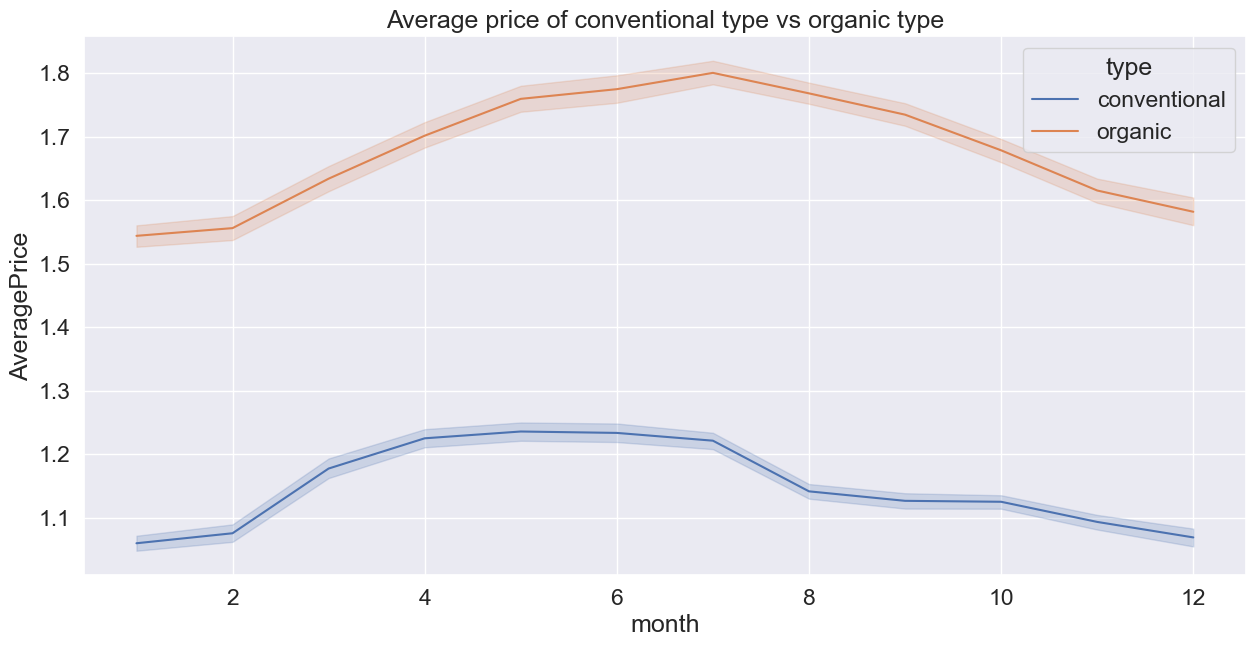

In [171]:
sns.lineplot(x='month', y='AveragePrice', hue='type', data=dataset)
plt.title('Average price of conventional type vs organic type')

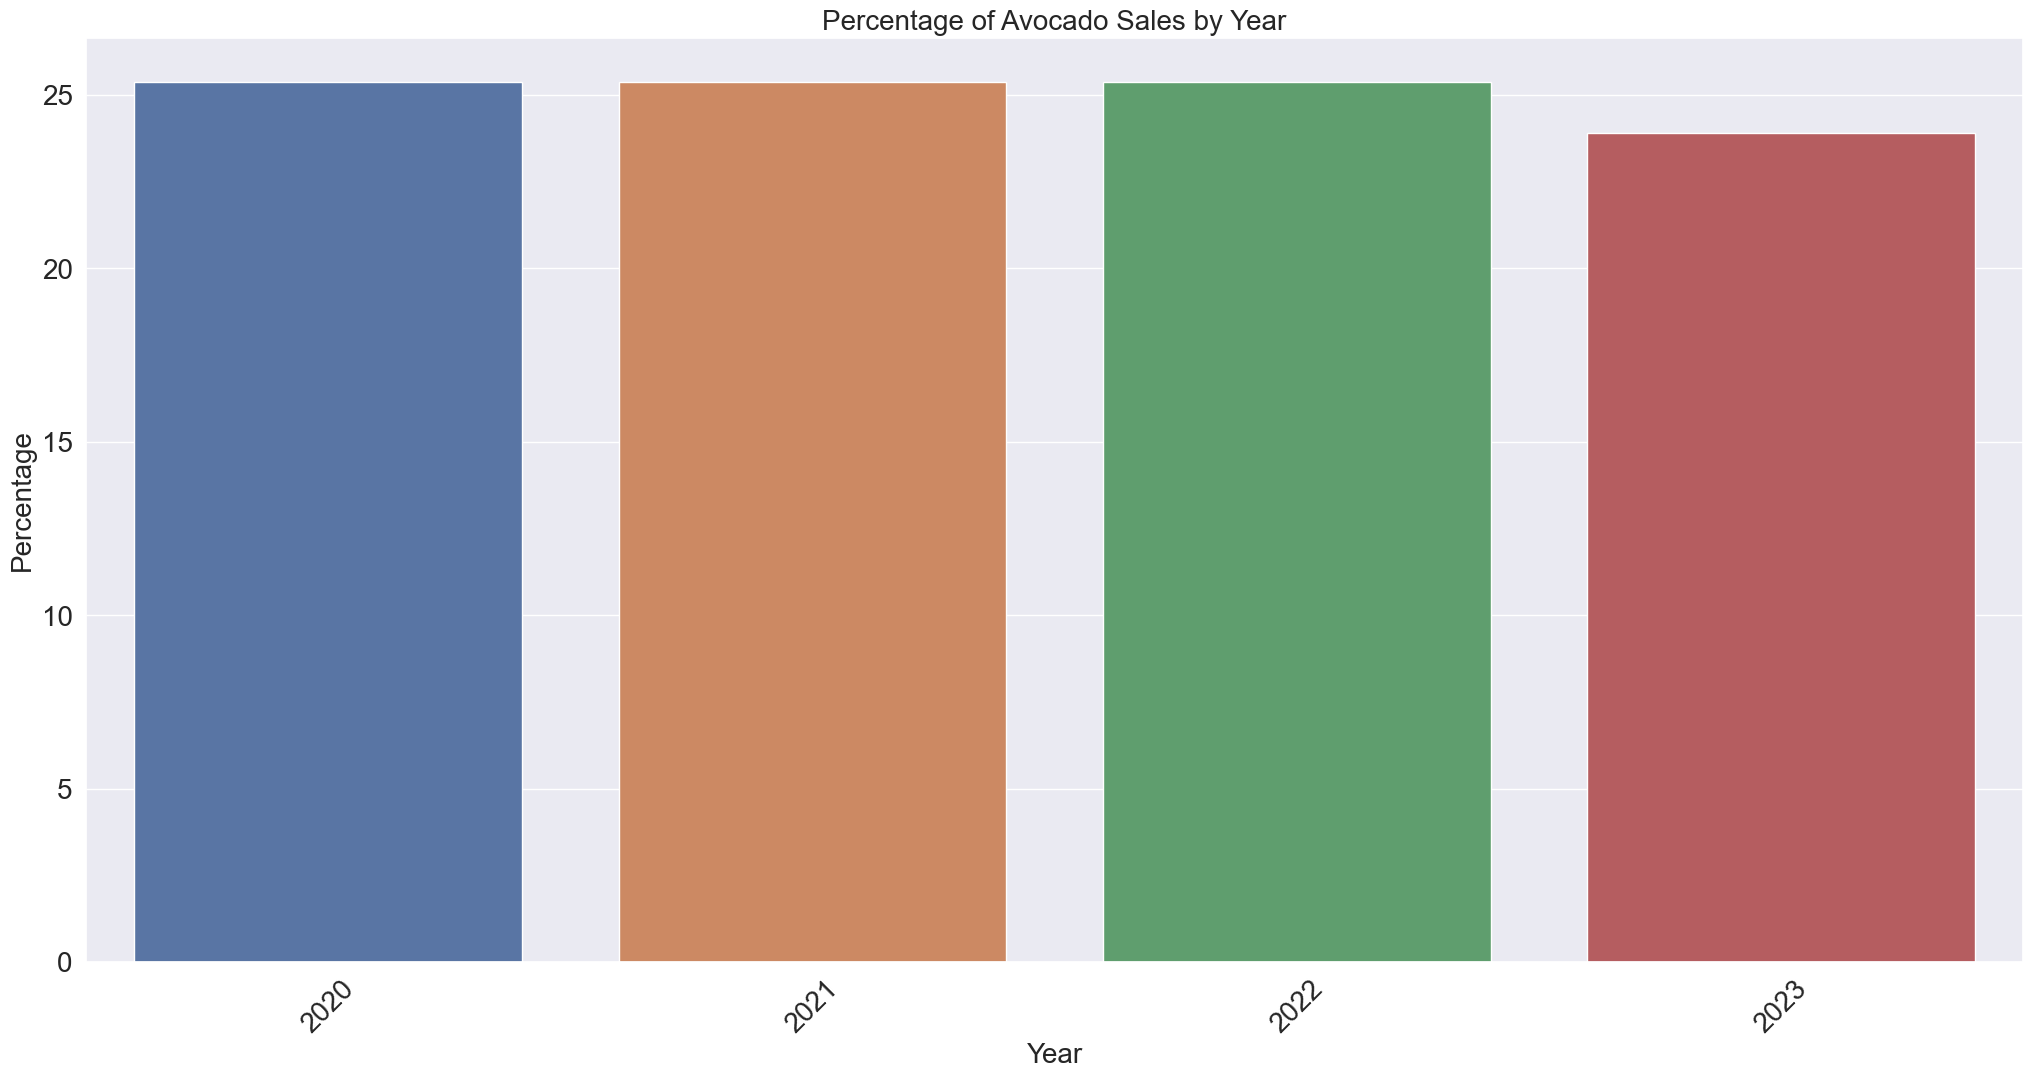

In [172]:

year_percentage = (dataset['Year'].value_counts() / len(dataset)) * 100

# Plotting the distribution using a bar plot
plt.figure(figsize=[25,12])
sns.barplot(x = year_percentage.index, y = year_percentage.values)
plt.xticks(rotation = 45)
plt.title('Percentage of Avocado Sales by Year', fontsize=20) 
plt.xlabel('Year', fontsize=20)  
plt.ylabel('Percentage', fontsize=20)
plt.xticks(rotation=45, fontsize=20) 
plt.yticks(fontsize=20)
plt.show()


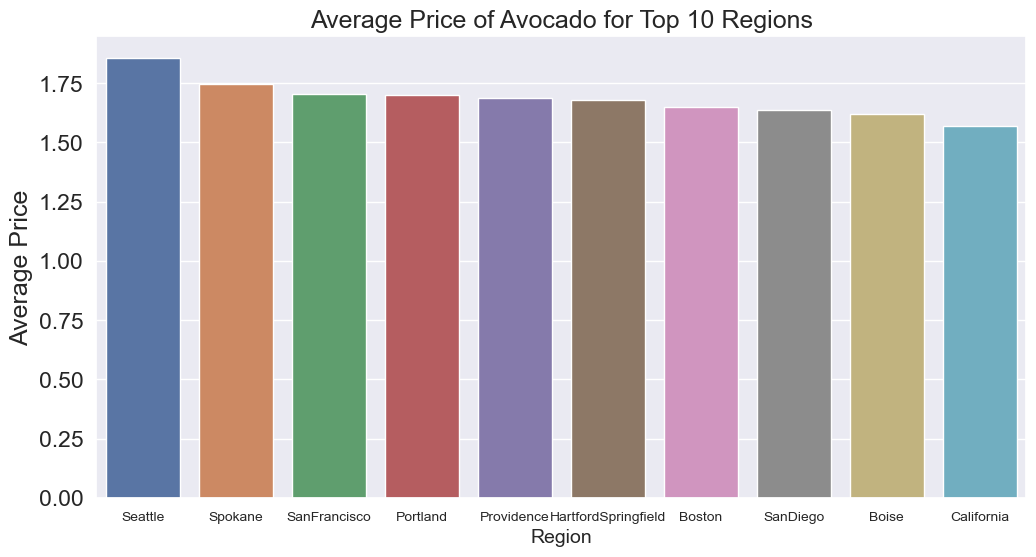

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is your dataframe containing avocado data

region_list = list(dataset.region.unique())
average_price = []

for i in region_list:
    x = dataset[dataset.region == i]
    region_average = sum(x.AveragePrice) / len(x)
    average_price.append(region_average)

df1 = pd.DataFrame({'region_list': region_list, 'average_price': average_price})
new_index = df1.average_price.sort_values(ascending=False).index.values
sorted_data = df1.reindex(new_index)

# Selecting only the top 10 regions
top_10_regions = sorted_data.head(10)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=top_10_regions.region_list, y=top_10_regions.average_price)


plt.xlabel('Region', fontsize=14)  
plt.ylabel('Average Price')
plt.title('Average Price of Avocado for Top 10 Regions')

# Increase font size for each x-label
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.show()


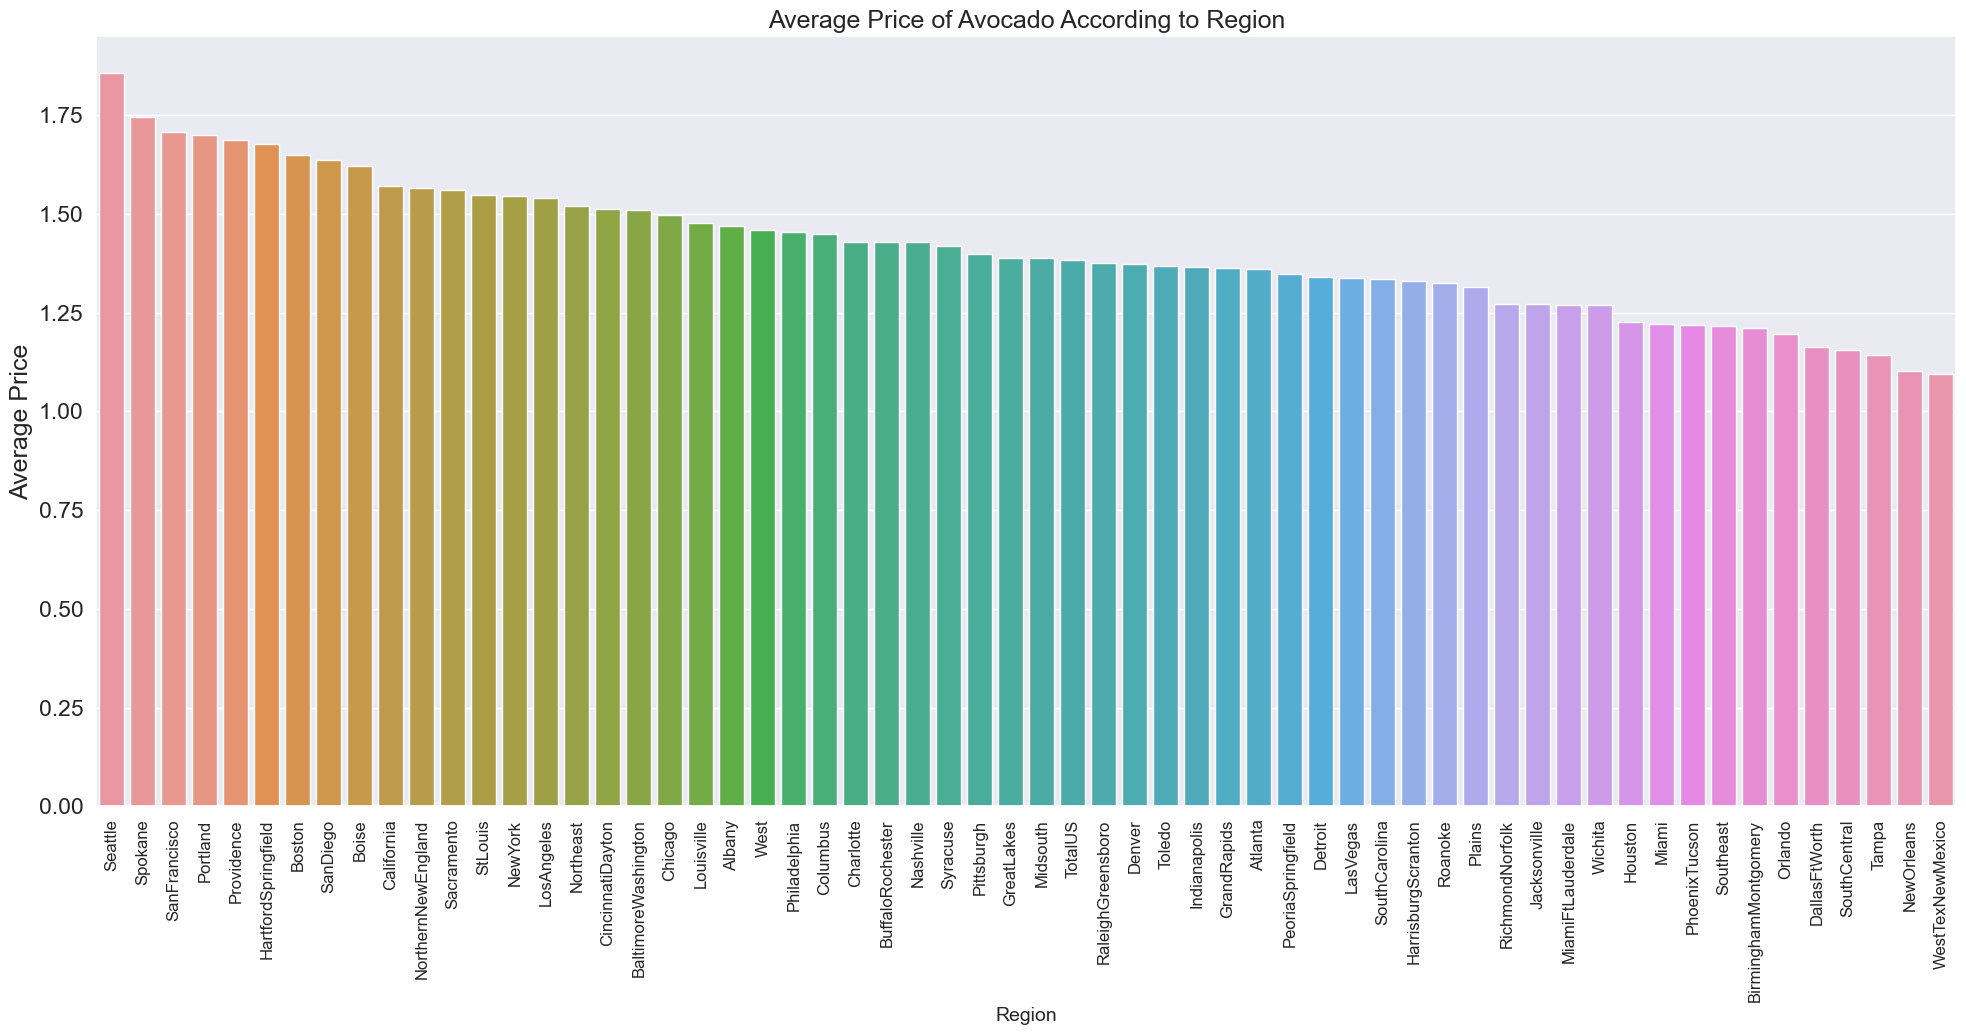

In [174]:

region_list = list(dataset.region.unique())
average_price = []

for i in region_list:
    x = dataset[dataset.region == i]
    region_average = sum(x.AveragePrice) / len(x)
    average_price.append(region_average)

df1 = pd.DataFrame({'region_list': region_list, 'average_price': average_price})
new_index = df1.average_price.sort_values(ascending=False).index.values
sorted_data = df1.reindex(new_index)

plt.figure(figsize=(24, 10))
ax = sns.barplot(x=sorted_data.region_list, y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=14)  # Increase font size for x-label
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# Increase font size for each x-label
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.show()


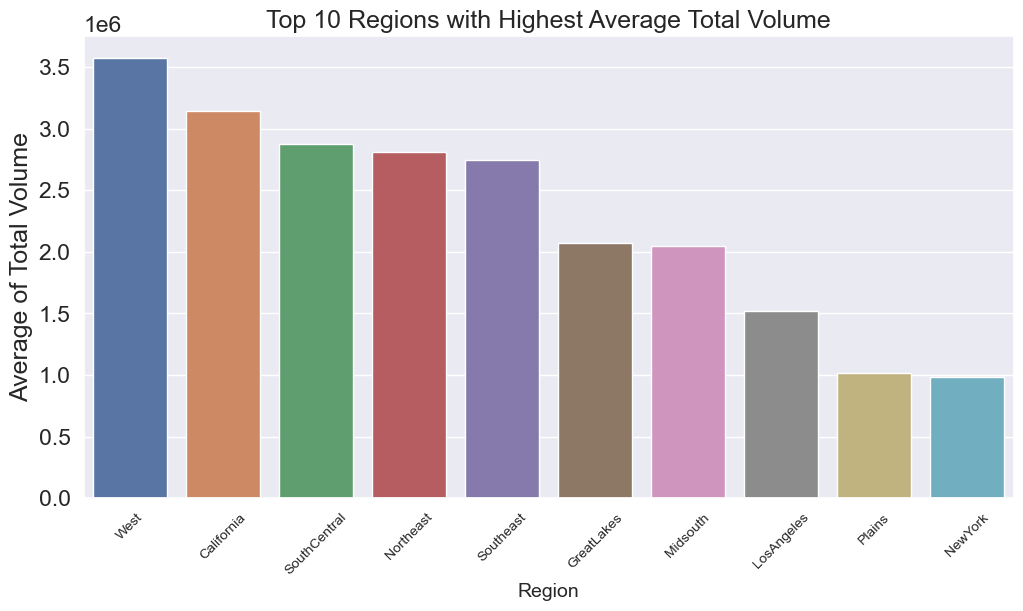

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is your dataframe containing avocado data

# Filtering out 'TotalUS' region
filter1 = dataset.region != 'TotalUS'
df1 = dataset[filter1]

region_list = list(df1.region.unique())
average_total_volume = []

for i in region_list:
    x = df1[df1.region == i]
    average_total_volume.append(sum(x['Total_volume']) / len(x))

df3 = pd.DataFrame({'region_list': region_list, 'average_total_volume': average_total_volume})

new_index = df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1 = df3.reindex(new_index)

# Selecting only the top 10 regions
top_10_regions = sorted_data1.head(10)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=top_10_regions.region_list, y=top_10_regions.average_total_volume)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average of Total Volume')
plt.title('Top 10 Regions with Highest Average Total Volume')

# Increase font size for each x-label
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.show()


In [176]:
# Assuming dataset is your dataframe containing avocado data

# Filtering out 'TotalUS' region
filter1 = dataset.region != 'TotalUS'
df1 = dataset[filter1]

region_list = list(df1.region.unique())
total_volume_sold = []

for i in region_list:
    x = df1[df1.region == i]
    total_volume_sold.append(sum(x['Total_volume']))

df3 = pd.DataFrame({'region_list': region_list, 'total_volume_sold': total_volume_sold})

new_index = df3.total_volume_sold.sort_values(ascending=False).index.values
sorted_data1 = df3.reindex(new_index)

# Selecting only the top 10 regions
top_10_regions = sorted_data1.head(10)

# Print the exact volume sold for each of the top 10 regions
for index, row in top_10_regions.iterrows():
    print(f"{row['region_list']}: {row['total_volume_sold']}")



West: 1464459597.7799997
California: 1290098084.8099995
SouthCentral: 1178527917.319999
Northeast: 1152527825.1100001
Southeast: 1126402834.9400003
GreatLakes: 848499218.1900002
Midsouth: 840921437.7599998
LosAngeles: 623897060.1800002
Plains: 416578206.1999998
NewYork: 404862714.9299999


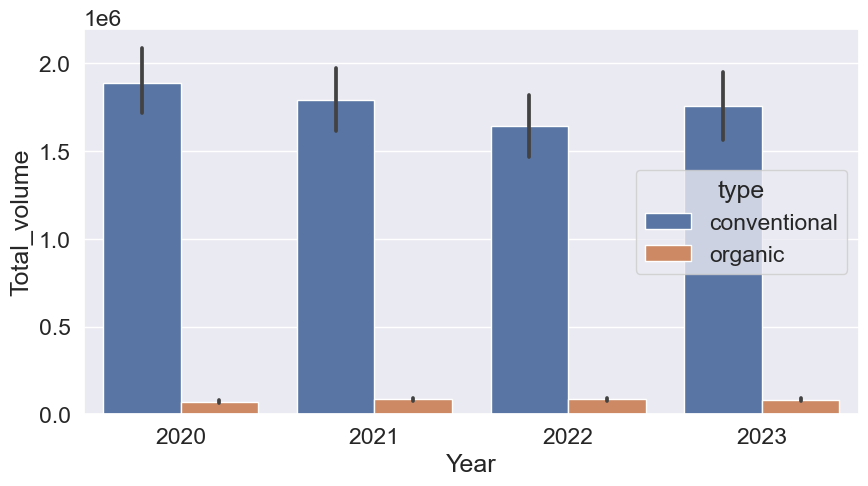

TypeError: datetime64 type does not support sum operations

In [177]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='Total_volume',hue='type', data=dataset)
plt.show()

print('Based on Type:',(dataset.groupby(['type']).sum())/1000000)


Total Unit Sold 4046: Year
2020    1739.521950
2021    1543.522002
2022    2456.693252
2023    2029.266197
Name: Small_Hass, dtype: float64


Total Unit Sold 4225: Year
2020    1127.055229
2021    1010.832721
2022    1117.285472
2023    1043.688358
Name: Large_Hass, dtype: float64


Total Unit Sold 4770: Year
2020     86.180114
2021     77.499118
2022    189.577779
2023    143.563402
Name: Extra_large_hass, dtype: float64


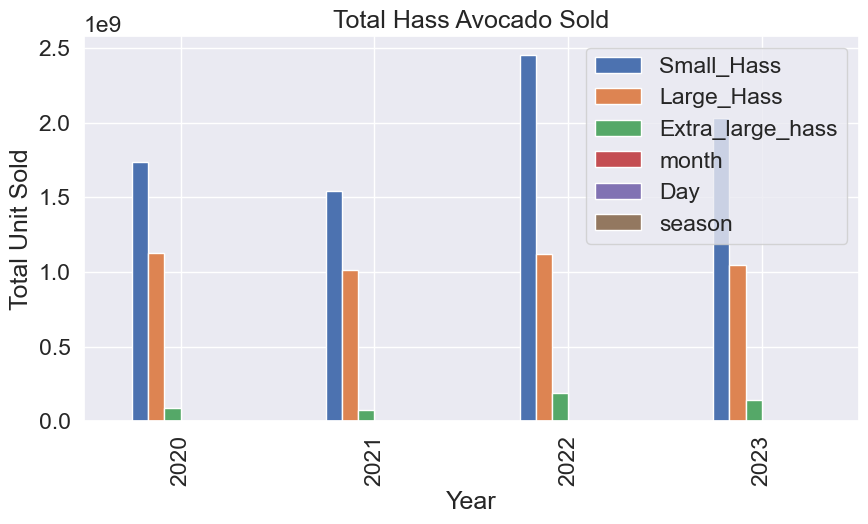

In [178]:
d2=dataset.copy()
d2.drop(['Date','AveragePrice','Total_volume','region','Total_bags'],axis=1,inplace=True)
d2.groupby(['Year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Hass Avocado Sold')
plt.ylabel('Total Unit Sold')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])  

print('Total Unit Sold 4046:',(dataset.groupby(['Year'])['Small_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold 4225:',(dataset.groupby(['Year'])['Large_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold 4770:',(dataset.groupby(['Year'])['Extra_large_hass'].sum())/1000000)


Total Unit Sold 4046: Year
2020    1739.521950
2021    1543.522002
2022    2456.693252
2023    2029.266197
Name: Small_Hass, dtype: float64


Total Unit Sold 4225: Year
2020    1127.055229
2021    1010.832721
2022    1117.285472
2023    1043.688358
Name: Large_Hass, dtype: float64


Total Unit Sold 4770: Year
2020     86.180114
2021     77.499118
2022    189.577779
2023    143.563402
Name: Extra_large_hass, dtype: float64


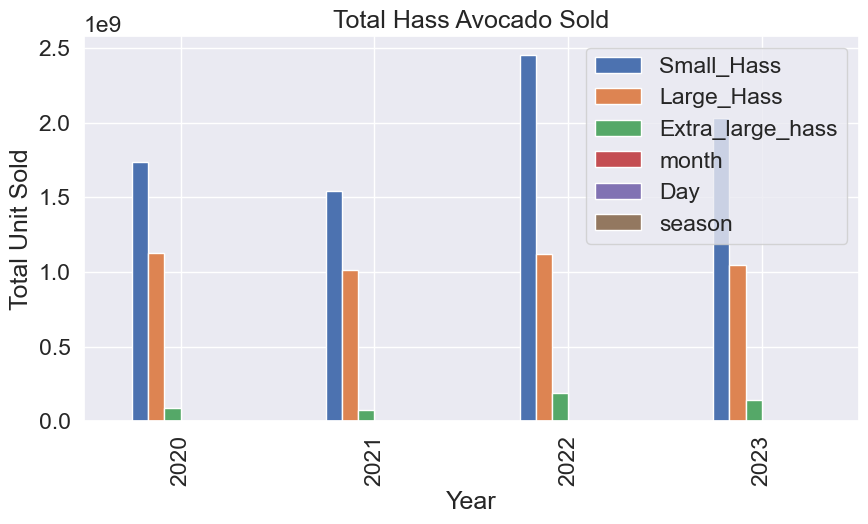

In [179]:
d2=dataset.copy()
d2.drop(['Date','AveragePrice','Total_volume','region','Total_bags'],axis=1,inplace=True)
d2.groupby(['Year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Hass Avocado Sold')
plt.ylabel('Total Unit Sold')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])  

print('Total Unit Sold 4046:',(dataset.groupby(['Year'])['Small_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold 4225:',(dataset.groupby(['Year'])['Large_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold 4770:',(dataset.groupby(['Year'])['Extra_large_hass'].sum())/1000000)


Text(0.5, 1.0, 'Average of Total Volume According to Region')

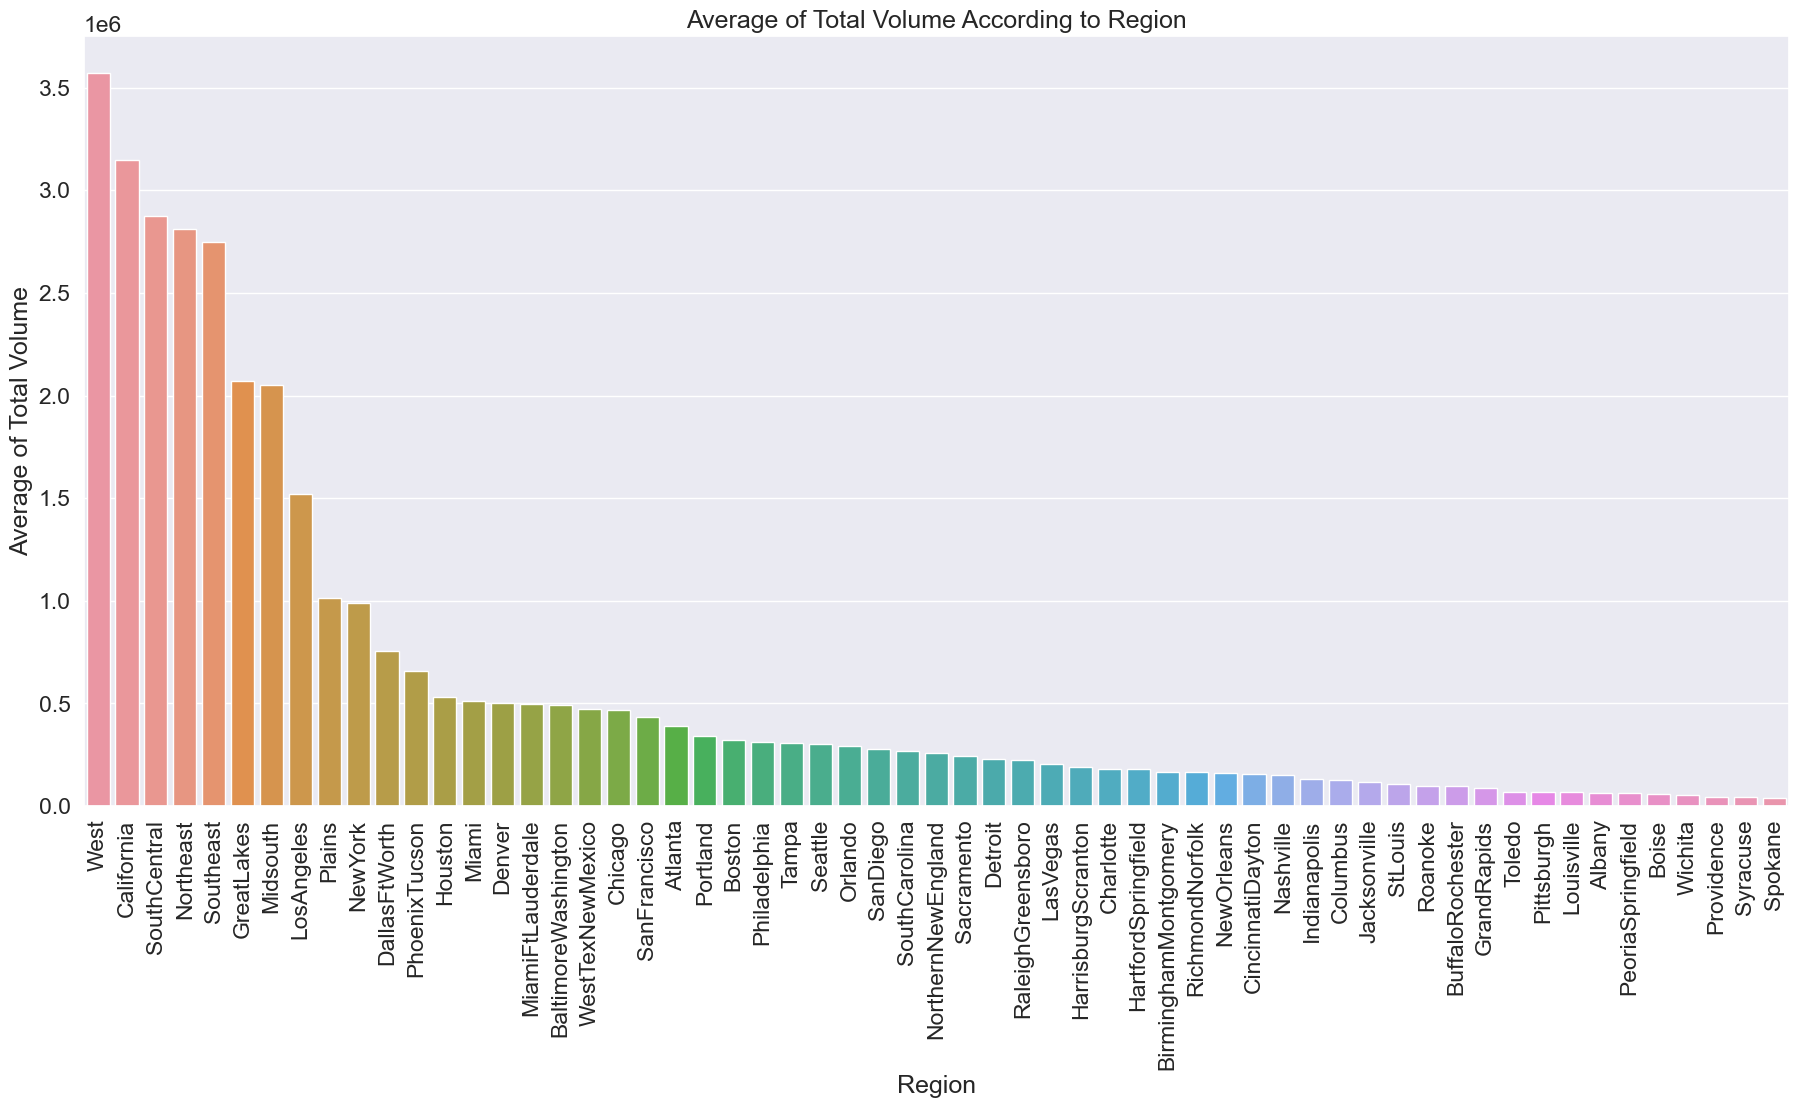

In [180]:
 #What are TOP 3 regions where Average consumption is very high?
filter1=dataset.region!='TotalUS'
df1=dataset[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total_volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

In [181]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

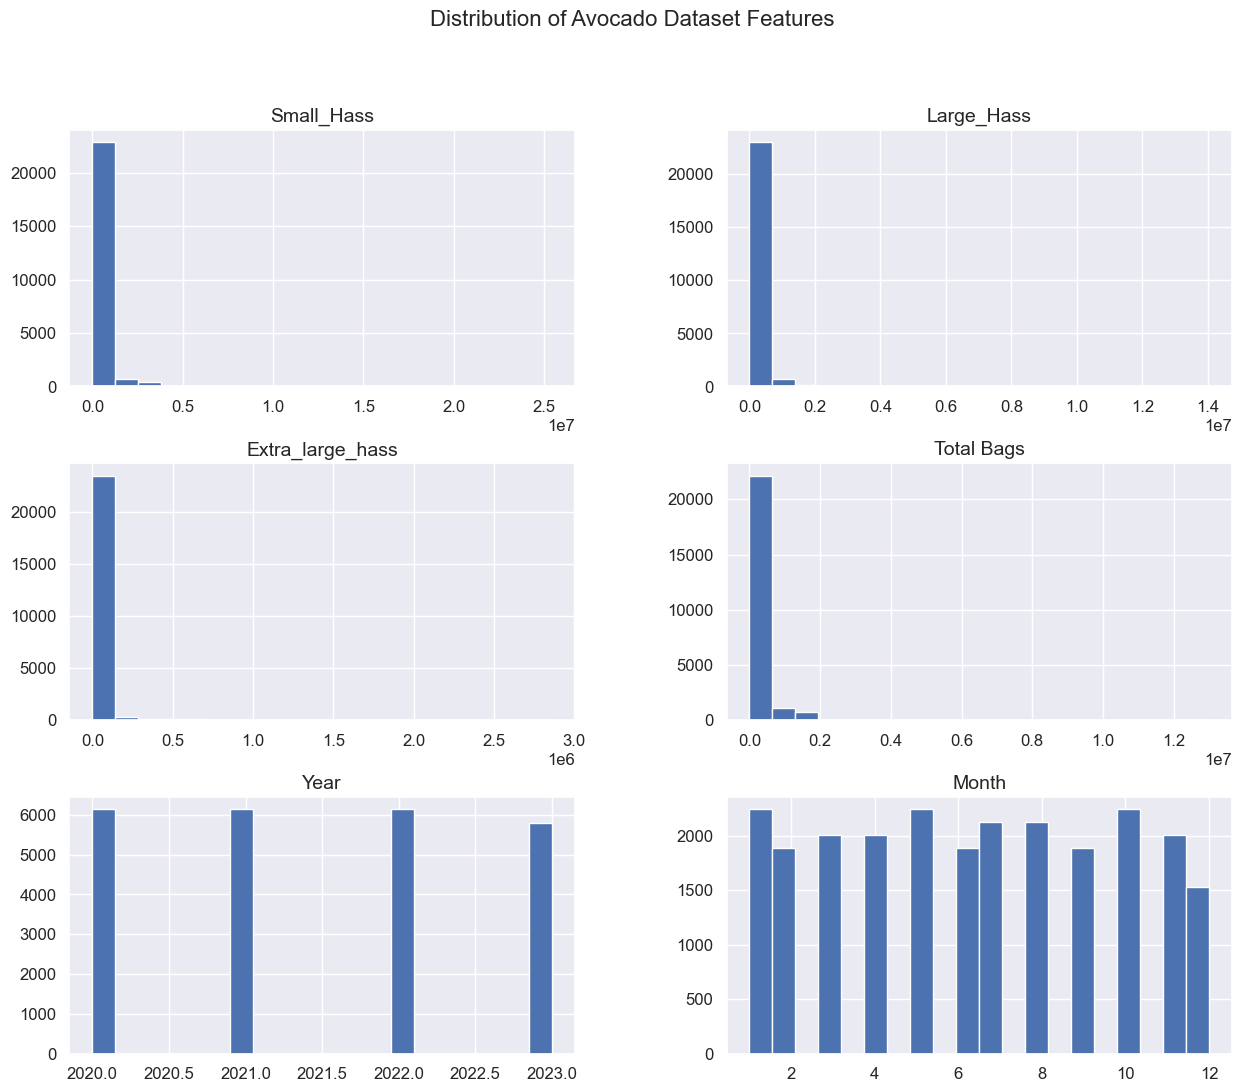

In [182]:
columns_to_plot = ['Small_Hass','Large_Hass','Extra_large_hass', 'Total_bags', 'Year', 'month']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
dataset[columns_to_plot].hist(ax=axes, grid=True, bins=20)
# Set individual subplot titles
titles = ['Small_Hass','Large_Hass','Extra_large_hass', 'Total Bags', 'Year', 'Month']
for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i], fontsize=14)
plt.suptitle("Distribution of Avocado Dataset Features", fontsize=16)
plt.show()

<Axes: title={'center': 'Distribution of Avocado Average Prices'}, xlabel='AveragePrice', ylabel='Density'>

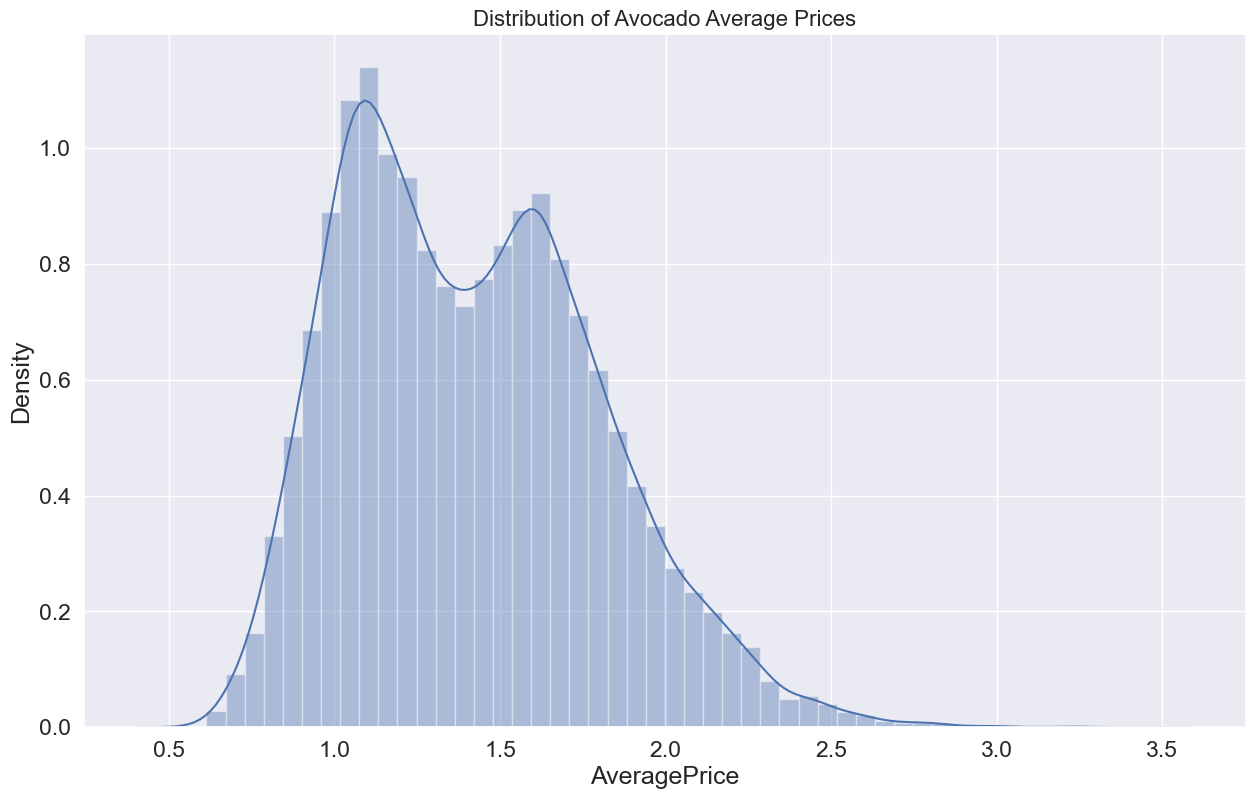

In [183]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
plt.title("Distribution of Avocado Average Prices", fontsize=16)
sns.distplot(a=dataset.AveragePrice, kde=True)

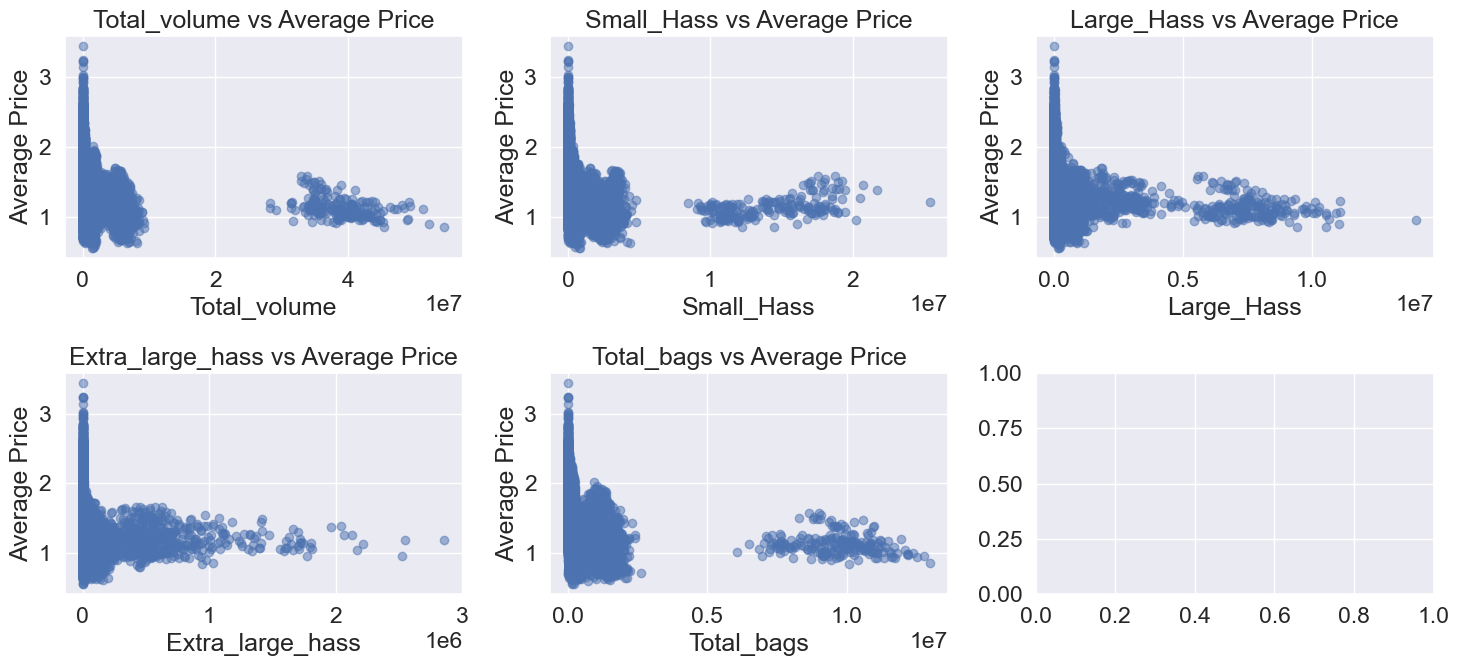

In [184]:
variable=['Total_volume','Small_Hass','Large_Hass','Extra_large_hass', 'Total_bags']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3)

# Iterate over each column and create scatter plots
for i, column in enumerate(variable):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[column], dataset['AveragePrice'], alpha=0.5)
    axes[row, col].set_title(f'{column} vs Average Price')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Average Price')

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

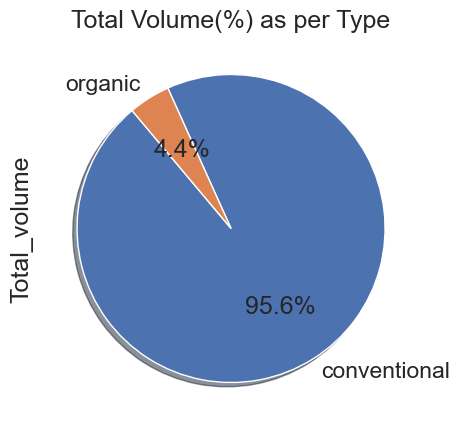

<Figure size 1000x500 with 0 Axes>

In [185]:
dataset.groupby(['type'])['Total_volume'].sum().plot(kind='pie',subplots=True,figsize=(10,5),
autopct='%1.1f%%', shadow=True, startangle=130)
plt.title('Total Volume(%) as per Type')

plt.figure(figsize=(10,5))

In [186]:
dataset['region'].nunique()

60

In [187]:
dataset['type'].nunique()

2

In [188]:
dataset.columns

Index(['Date', 'AveragePrice', 'Total_volume', 'Small_Hass', 'Large_Hass',
       'Extra_large_hass', 'Total_bags', 'type', 'region', 'month', 'Day',
       'Year', 'season'],
      dtype='object')

<Axes: >

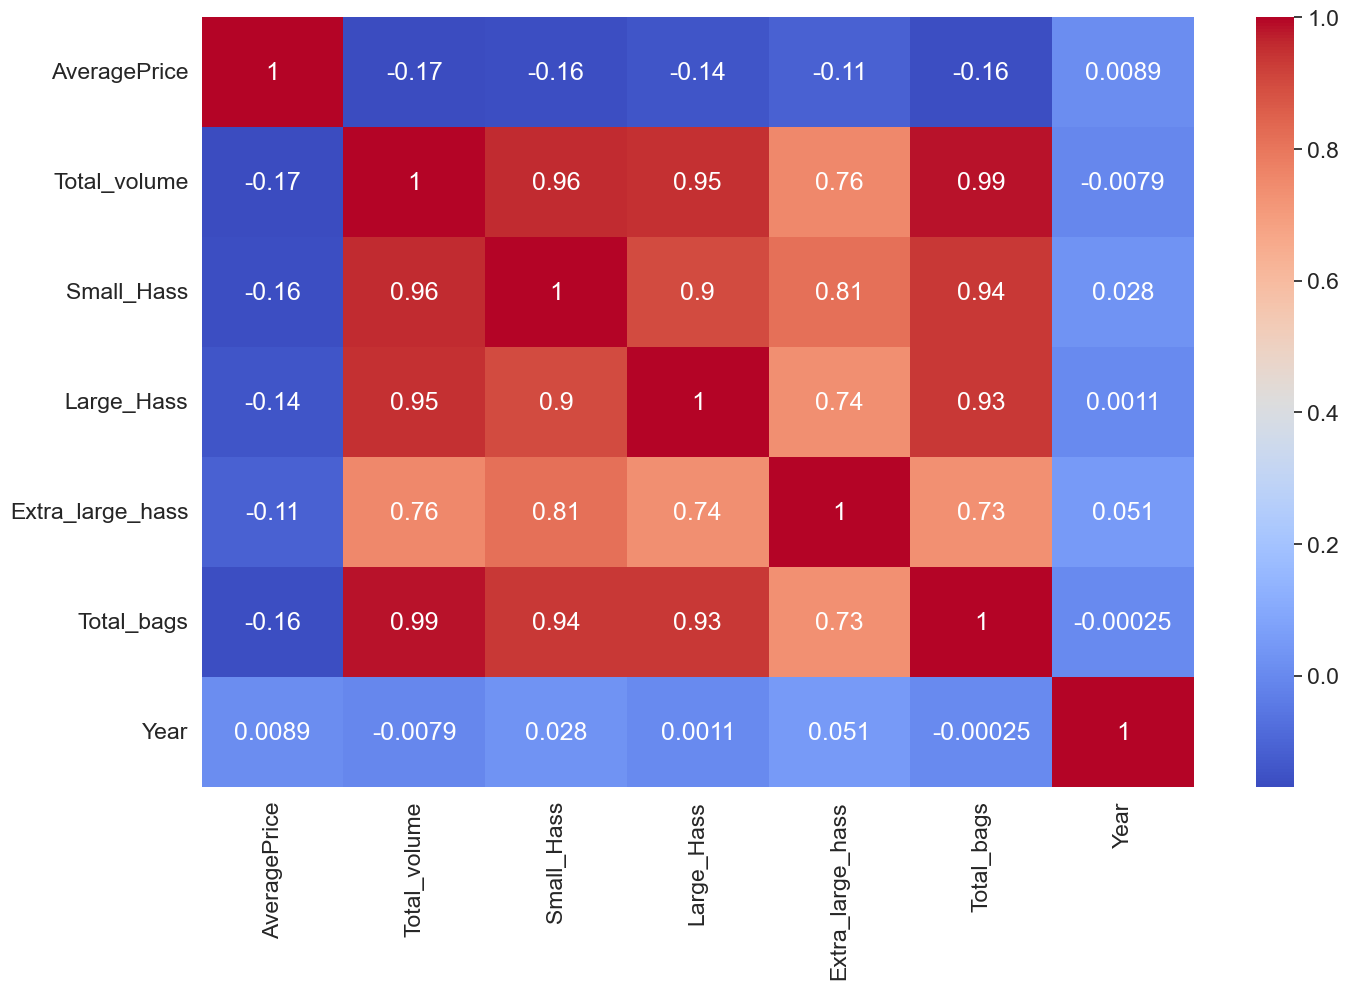

In [189]:
columns_to_plot = ['AveragePrice','Total_volume','Small_Hass','Large_Hass','Extra_large_hass', 'Total_bags', 'Year']
plt.figure(figsize=(16,10))
sns.heatmap(dataset[columns_to_plot].corr(),cmap='coolwarm',annot=True)

AveragePrice           Axes(0.125,0.747241;0.227941x0.132759)
Total_volume        Axes(0.398529,0.747241;0.227941x0.132759)
Small_Hass          Axes(0.672059,0.747241;0.227941x0.132759)
Large_Hass             Axes(0.125,0.587931;0.227941x0.132759)
Extra_large_hass    Axes(0.398529,0.587931;0.227941x0.132759)
Total_bags          Axes(0.672059,0.587931;0.227941x0.132759)
month                  Axes(0.125,0.428621;0.227941x0.132759)
Day                 Axes(0.398529,0.428621;0.227941x0.132759)
Year                Axes(0.672059,0.428621;0.227941x0.132759)
season                  Axes(0.125,0.26931;0.227941x0.132759)
dtype: object

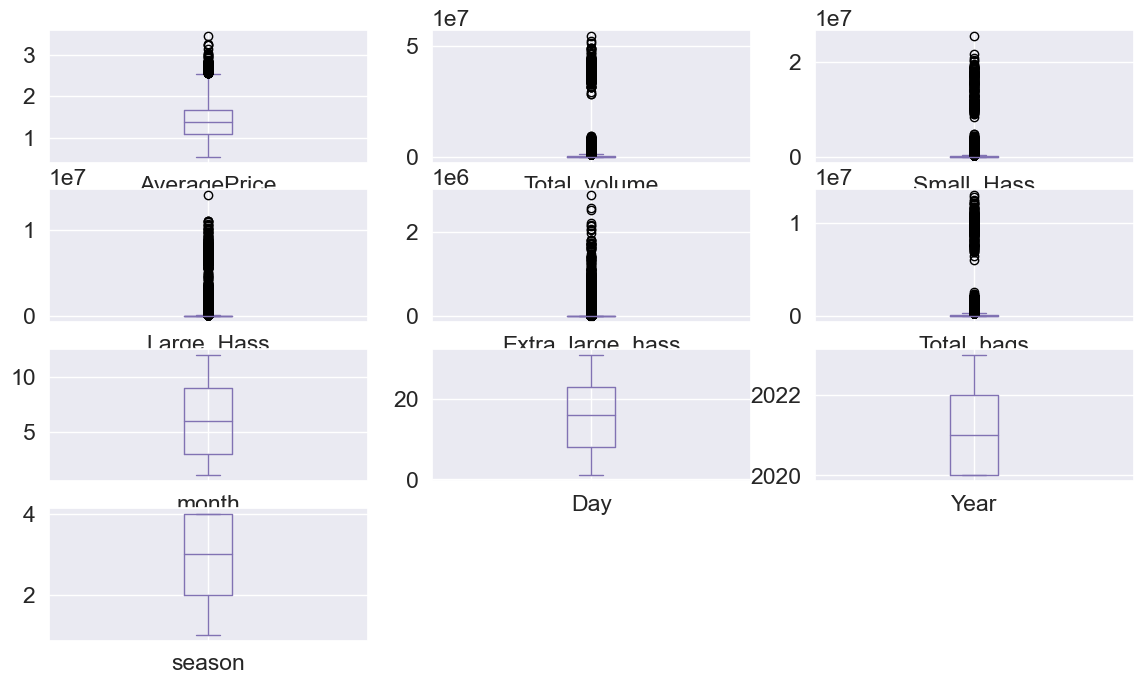

In [190]:
#outliers
dataset.plot(kind='box',subplots=True,layout=(5,3),figsize=(14,10),color='m')

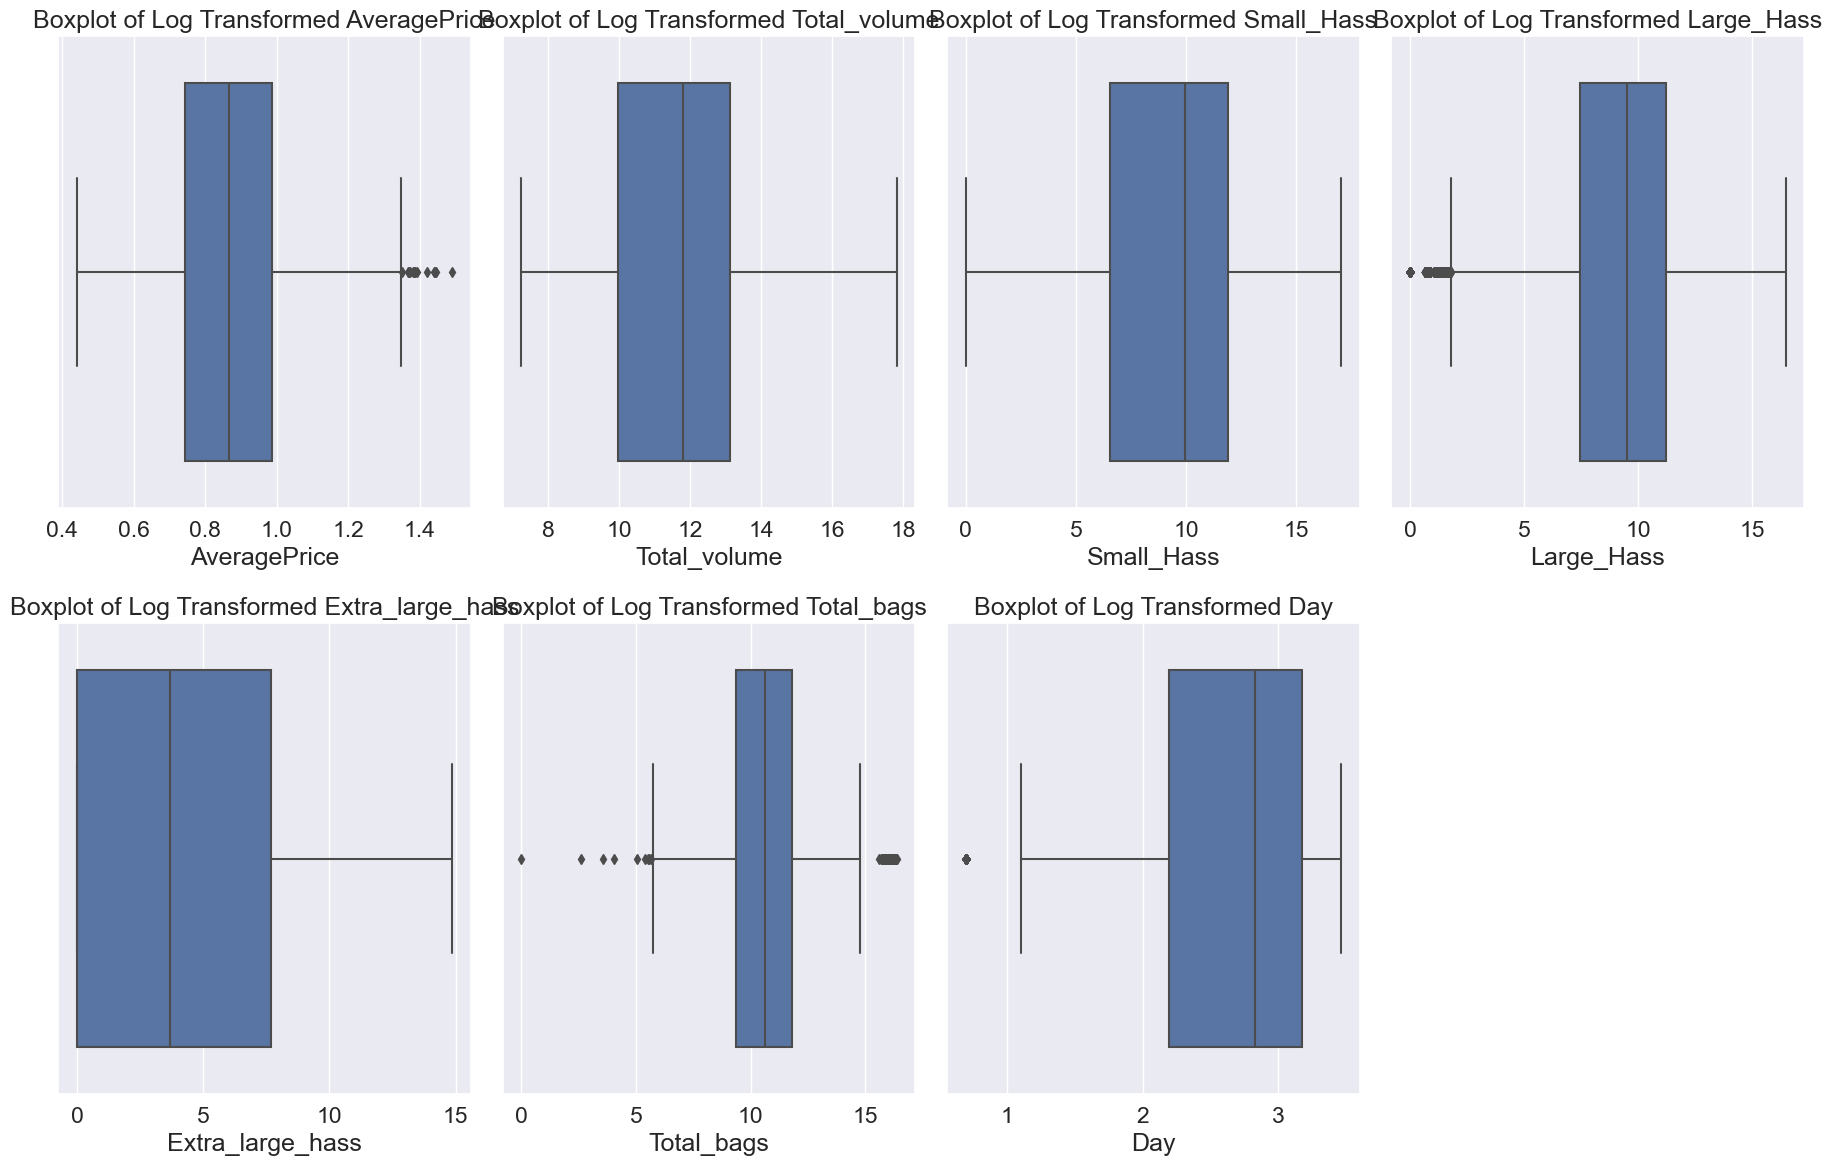

In [191]:
#boxplots
num_features = dataset.select_dtypes(include=['int64', 'float64']).columns
# Apply logarithmic transformation to numerical features to reduce the impact of outliers
# Adding 1 before applying log to handle zeros
avocado_data_transformed = dataset.copy()
avocado_data_transformed[num_features] = np.log1p(dataset[num_features])

# Initialize the figure
plt.figure(figsize=(18,12))


# Create boxplots for each transformed numerical feature to assess the impact on outliers
num_plots = len(num_features)
num_rows = (num_plots // 4) + (1 if num_plots % 4 != 0 else 0)  # Calculate number of rows needed
for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, 4, i)  # Adjust subplot creation
    sns.boxplot(x=avocado_data_transformed[feature])
    plt.title(f'Boxplot of Log Transformed {feature}')

plt.tight_layout()
plt.show()

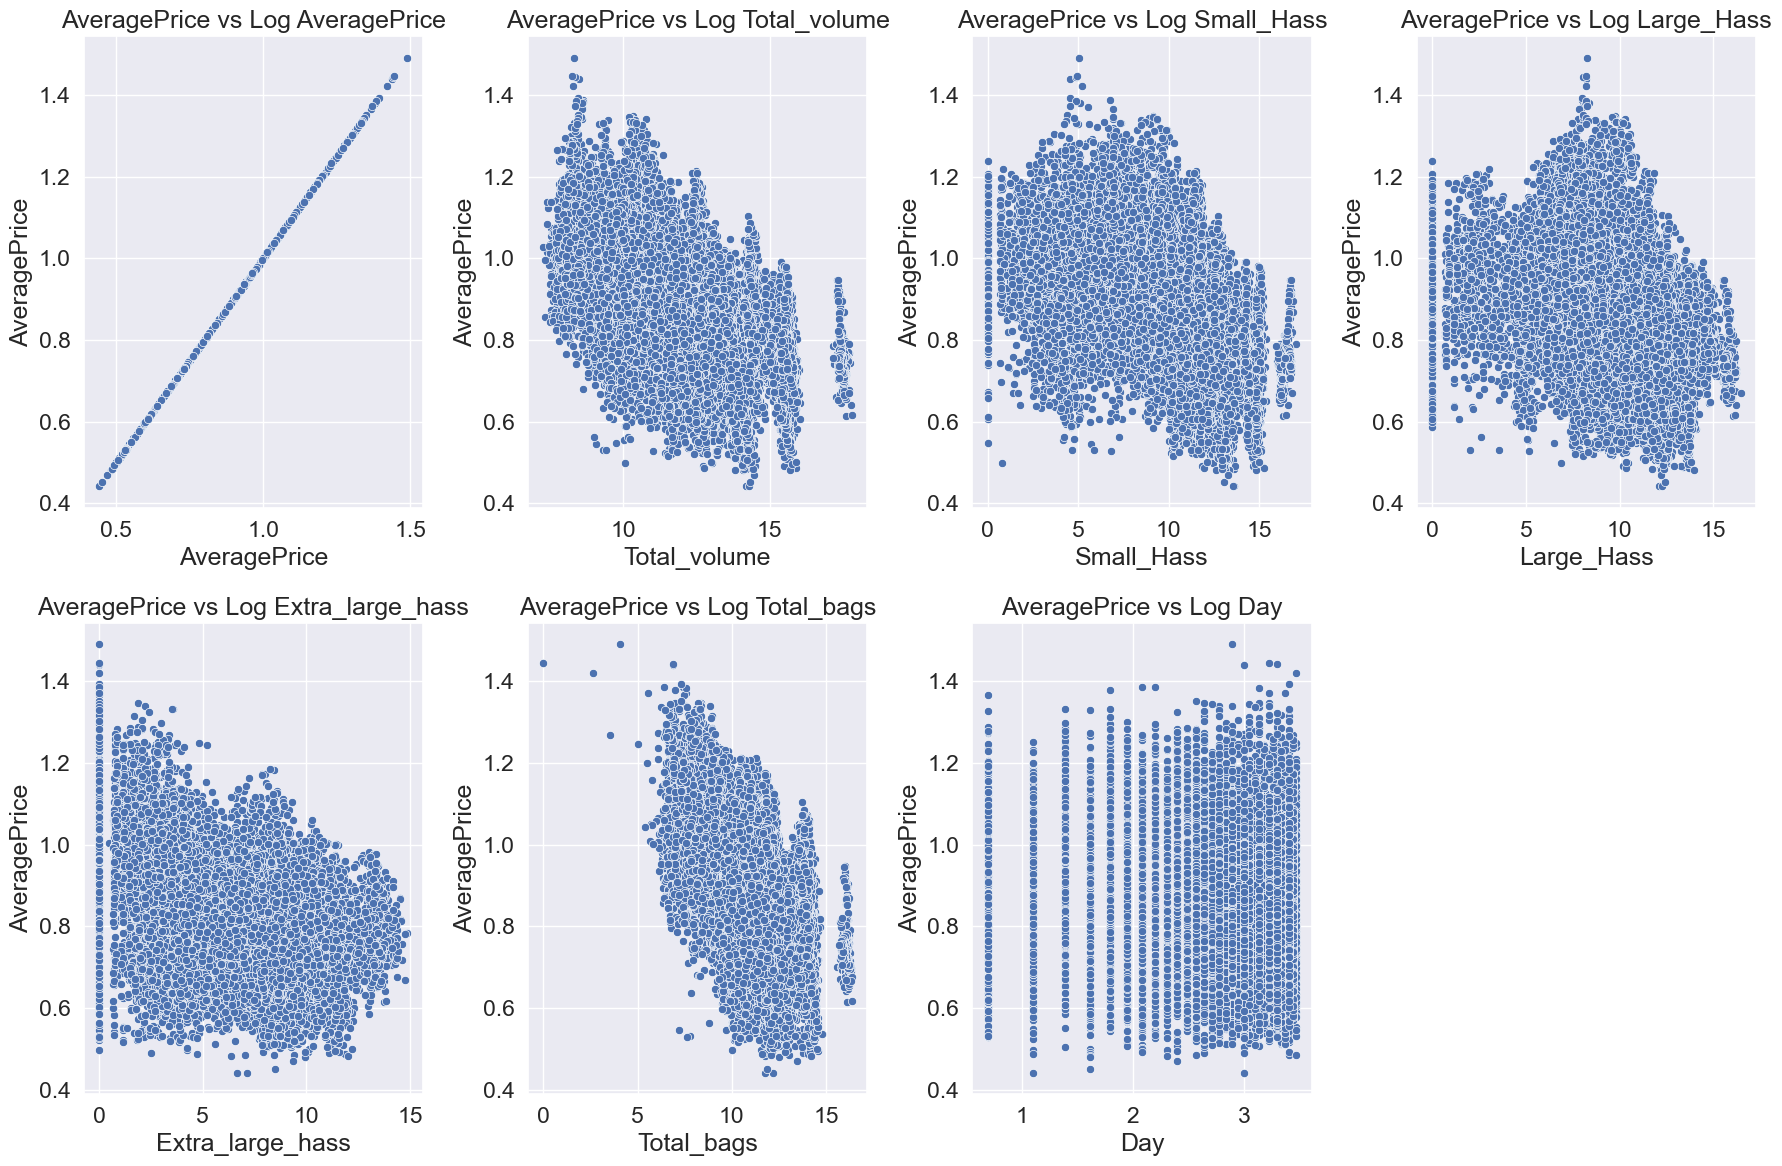

In [192]:
#log transformation
# Calculate numerical features
num_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply logarithmic transformation to numerical features to reduce the impact of outliers
# Adding 1 before applying log to handle zeros
avocado_data_transformed = dataset.copy()
avocado_data_transformed[num_features] = np.log1p(dataset[num_features])

# Initialize the figure
plt.figure(figsize=(18, 12))

# Calculate the number of rows and columns for subplots based on the number of features
num_features_count = len(num_features)
num_rows = (num_features_count // 4) + (1 if num_features_count % 4 != 0 else 0)
num_cols = min(num_features_count, 4)

# Create subplots for each transformed numerical feature
for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(data=avocado_data_transformed, x=feature, y='AveragePrice')
    plt.title(f'AveragePrice vs Log {feature}')

plt.tight_layout()
plt.show()

In [193]:
# One-hot encode 
avocado_data_encoded = pd.get_dummies(avocado_data_transformed, columns=['type','region'], drop_first=True)
avocado_data_encoded.replace({False: 0, True: 1}, inplace=True)
avocado_data_encoded.head()

avocado_data_encoded=avocado_data_encoded.drop(['Date'],axis=1)


In [194]:
df=avocado_data_encoded
df

AveragePrice  Total_volume  Small_Hass  Large_Hass  Extra_large_hass  \
0          0.767837     11.993666    8.226306   11.853981          5.221220   
1          1.015679      7.399013    2.970414    5.103579          0.000000   
2          0.663656     13.478984   12.659783   10.373103          7.922544   
3          0.954064     10.029608    4.504908    8.072327          0.000000   
4          0.785819     13.708029   11.574727   13.041575          8.674518   
...             ...           ...         ...         ...               ...   
24185      0.936295      8.647328    5.326127    7.100233          0.000000   
24186      0.994702     12.746439   11.109600   11.791134          4.088494   
24187      0.962766     10.458403    9.627959    7.100341          0.000000   
24188      0.808886      7.987467    6.965590    2.135349          0.000000   
24189      0.907952     14.513656   12.512856   12.522640          4.165579   

       Total_bags  month       Day  Year  season  ...  region_Southeast  \
0        9.305437      1  1.945910  2020       1  ...                 0   
1        7.206793      1  1.945910  2020       1  ...                 0   
2       11.385668      1  1.945910  2020       1  ...                 0   
3        8.611916      1  1.945910  2020       1  ...                 0   
4       12.420170      1  1.945910  2020       1  ...                 0   
...           ...    ...       ...   ...     ...  ...               ...   
24185    8.361482     12  1.386294  2023       1  ...                 0   
24186   11.841016     12  1.386294  2023       1  ...                 0   
24187    9.802377     12  1.386294  2023       1  ...                 0   
24188    7.484475     12  1.386294  2023       1  ...                 0   
24189   14.126310     12  1.386294  2023       1  ...                 0   

       region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0                   0               0                0             0   
1                   0               0                0             0   
2                   0               0                0             0   
3                   0               0                0             0   
4                   0               0                0             0   
...               ...             ...              ...           ...   
24185               0               0                0             0   
24186               0               0                0             0   
24187               0               0                0             0   
24188               0               0                0             0   
24189               0               0                0             0   

       region_Toledo  region_TotalUS  region_West  region_WestTexNewMexico  \
0                  0               0            0                        0   
1                  0               0            0                        0   
2                  0               0            0                        0   
3                  0               0            0                        0   
4                  0               0            0                        0   
...              ...             ...          ...                      ...   
24185              1               0            0                        0   
24186              0               0            1                        0   
24187              0               0            0                        1   
24188              0               0            0                        0   
24189              0               1            0                        0   

       region_Wichita  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
24185               0  
24186               0  
24187               0  
24188               1  
24189               0  

[24190 rows x 70 columns]

In [255]:
df.groupby('type_organic')['AveragePrice'].mean()

type_organic
0    0.760363
1    0.978929
Name: AveragePrice, dtype: float64

Text(0.5, 1.0, 'Average Price Per Month')

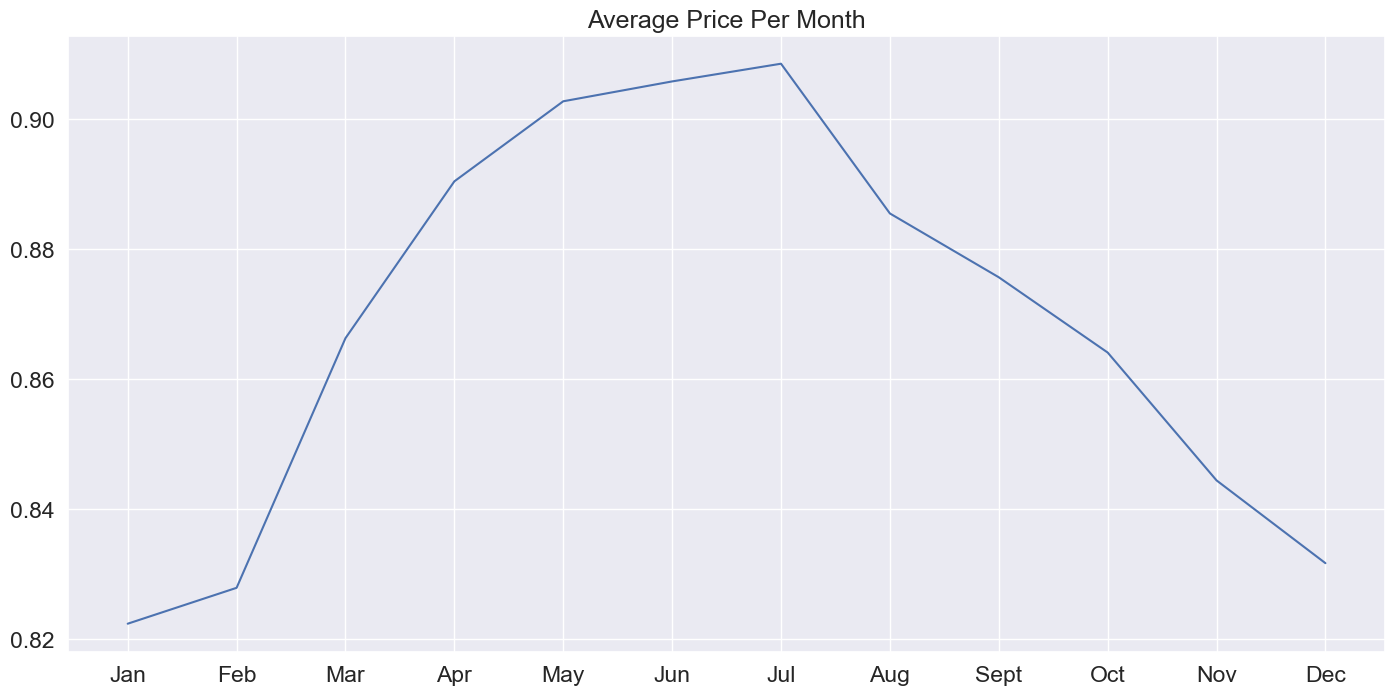

In [195]:
byMonth = df.groupby("month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')


Text(0.5, 1.0, 'Average Price Per season')

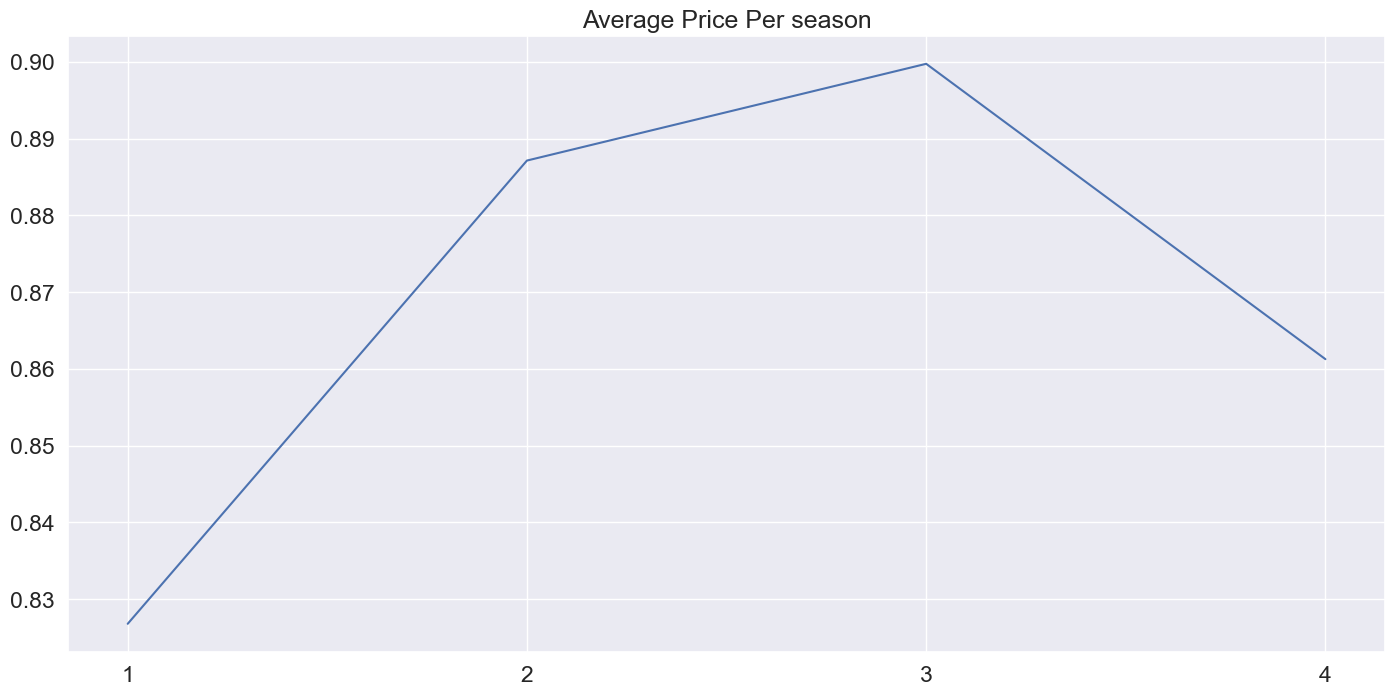

In [196]:
bySeason = df.groupby("season").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["1","2","3","4"],bySeason['AveragePrice'])
plt.title('Average Price Per season')

In [197]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=[ 'AveragePrice'])
y = df['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((19352, 69), (4838, 69), (19352,), (4838,))

In [198]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, mae_lr, r2_lr

(0.07609113104523861, 0.05966227894383562, 0.7671306992040855)

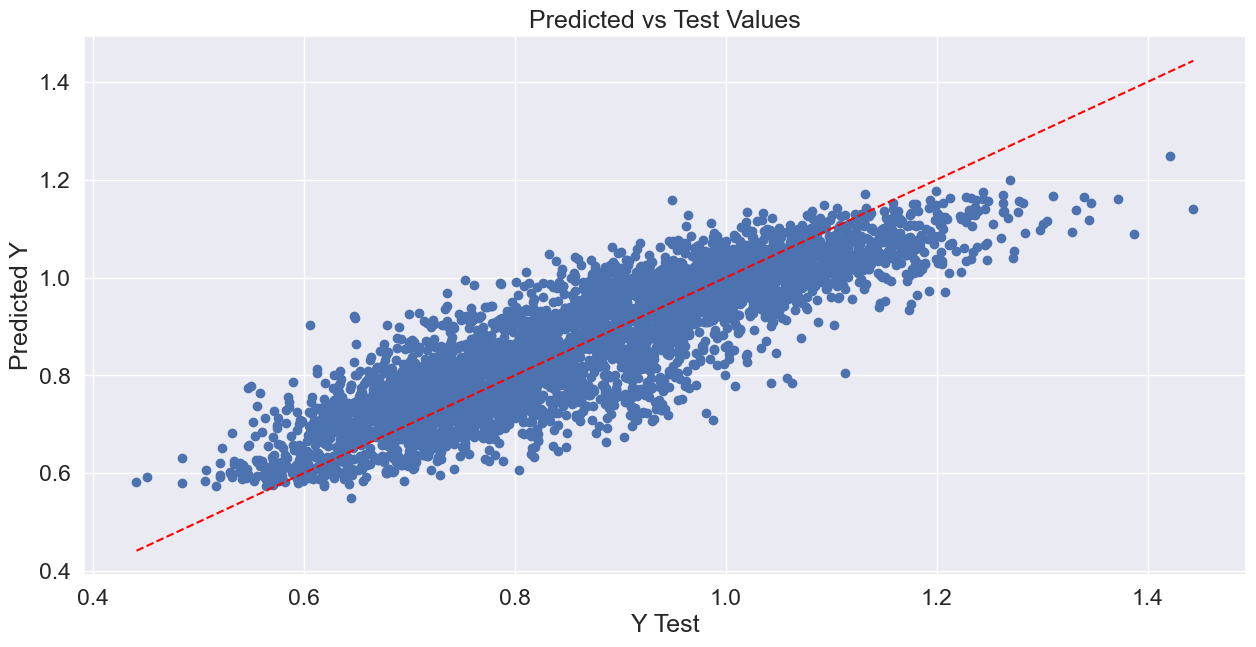

In [199]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(x=y_test, y=y_pred_lr)
plt.title('Predicted vs Test Values')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()


In [200]:
residuals = y_test - y_pred_lr

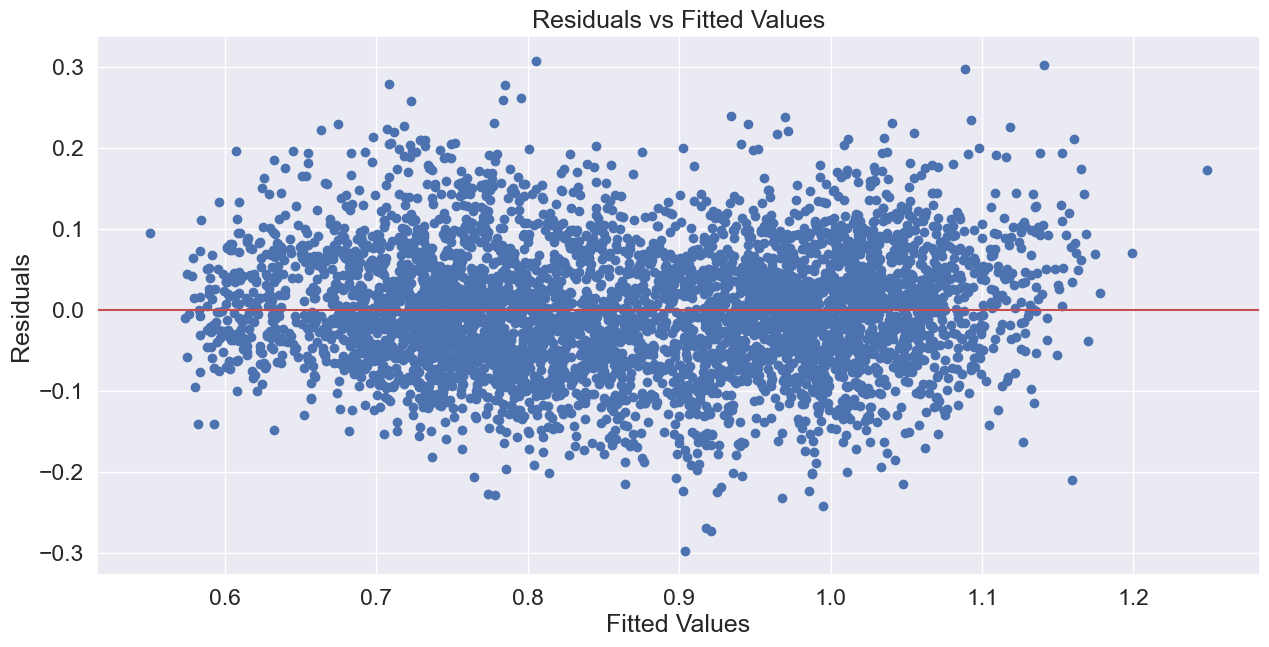

In [201]:
# 1. Check for Linearity: Residuals vs Fitted Values Plot
plt.scatter(y_pred_lr, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [202]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor


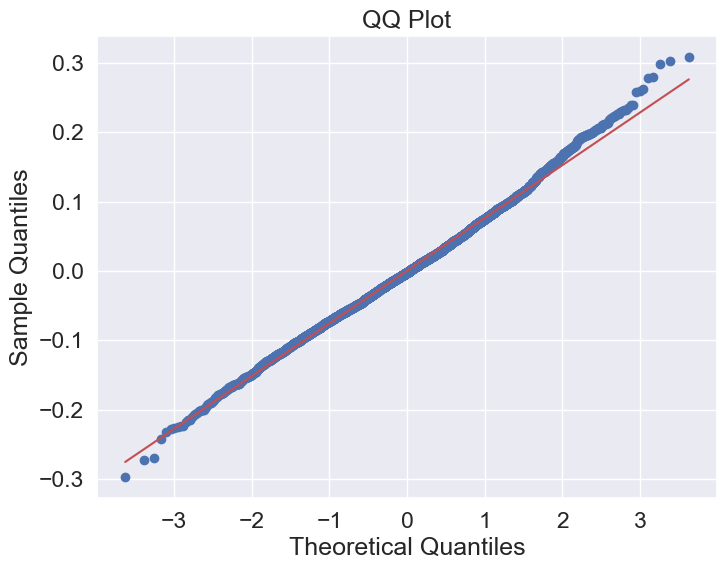

In [203]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [204]:
X_train1 = X_train[['Total_volume','Total_bags','Year','month','Day','season','type_organic','Small_Hass','Large_Hass','Extra_large_hass']]
y_train1 = y

X_test1 = X_test[['Total_volume','Total_bags','Year','month','Day','season','type_organic','Small_Hass','Large_Hass','Extra_large_hass']]
y_test1 = y


In [205]:
# Add a constant term to the independent variables (for the intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [206]:
# 4. Check for Multicollinearity: Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Features"] = X_test.columns
vif["VIF"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
print(vif)


                   Features           VIF
0                     const  3.633349e+06
1              Total_volume  1.066020e+02
2                Small_Hass  8.349367e+00
3                Large_Hass  6.459580e+00
4          Extra_large_hass  5.688495e+00
..                      ...           ...
65            region_Toledo  2.101187e+00
66           region_TotalUS  8.905814e+00
67              region_West  6.908786e+00
68  region_WestTexNewMexico  2.948977e+00
69           region_Wichita  2.123181e+00

[70 rows x 2 columns]


In [207]:
# White Test for Heteroscedasticity
white_test = het_white(residuals, X_test)
print("White test p-value:", white_test[1])


White test p-value: 4.473788180511095e-129


In [208]:
# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
test_statistic = shapiro_test[0]
p_value = shapiro_test[1]

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", test_statistic)
print("P-value:", p_value)

Shapiro-Wilk Test Statistic: 0.9966365694999695
P-value: 5.4798157123059354e-09


In [209]:
# 5. Check for Autocorrelation: Durbin-Watson Test
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 1.9926005310287673


In [210]:
#knn regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predict on the scaled test data
y_pred_knn = knn_model.predict(X_test)

# Calculate evaluation metrics
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

rmse_knn, mae_knn, r2_knn

(0.052024221899476635, 0.037767805971083465, 0.891143254336487)

In [211]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
# Evaluate the model
rmse_dt = mean_squared_error(y_test, pred, squared=False)
mae_dt = mean_absolute_error(y_test, pred)
r2_dt= r2_score(y_test, pred)
rmse_dt, mae_dt, r2_dt

(0.057947875752782346, 0.03903496176071743, 0.8649423463679708)

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


# Define base regressor
base_regressor = DecisionTreeRegressor()

# Create Bagging Regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions
predictions = bagging_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2=r2_score(y_test,predictions)
print("Mean Absolute Error:", mae)
print("RMSE:", rmse)
print("R2-score:", r2)

Mean Absolute Error: 0.030625946505868758
RMSE: 0.04277396215303247
R2-score: 0.9264126571210807


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge regression model
alpha = 2.0  # Regularization strength (hyperparameter)
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_scaled, y_train)

# Predict on testing set
y_test_pred = ridge_reg.predict(X_test_scaled)

# Evaluate model performance
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2=r2_score(y_test,y_test_pred)
print("Ridge Regression Model Evaluation:")
print("RMSE:", rmse)
print("R2-score:", r2)


Ridge Regression Model Evaluation:
RMSE: 0.076088866256345
R2-score: 0.7671445613178445


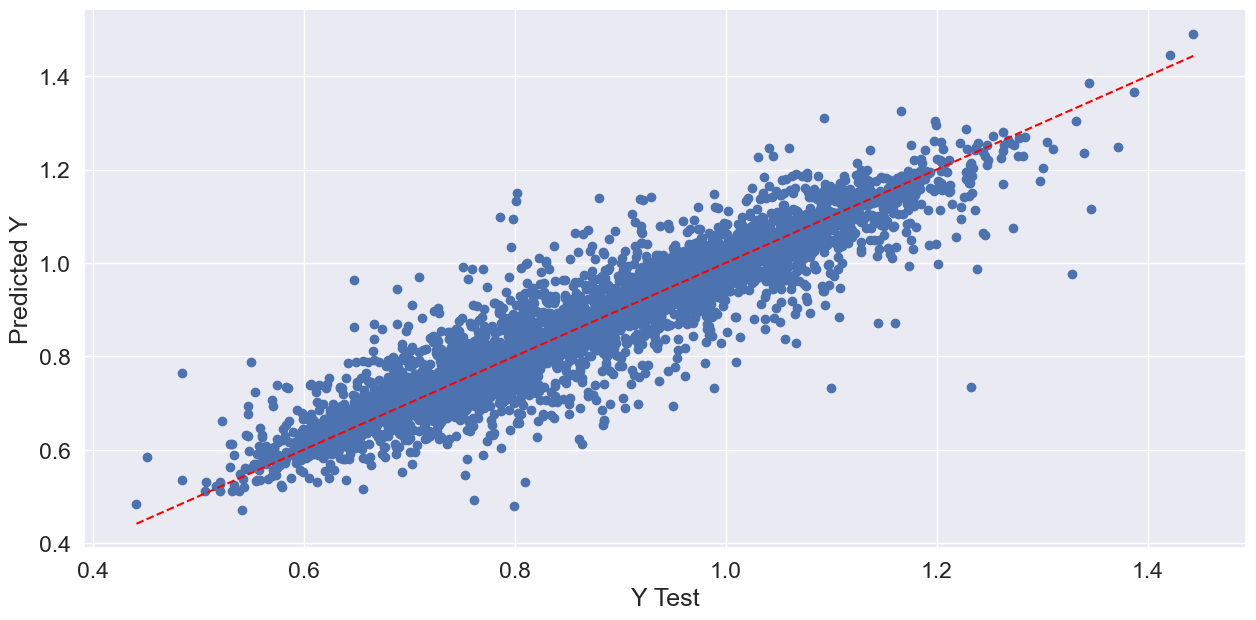

In [212]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

In [213]:
#Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [214]:
#Adaboost regressor
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

rmse_ada = mean_squared_error(y_test, y_pred_ada, squared=False)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

rmse_ada, mae_ada, r2_ada

(0.09377235348697714, 0.07621586622582376, 0.6463336079937618)

In [215]:
#gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

rmse_gb, mae_gb, r2_gb

(0.06970980394865467, 0.054867641477383426, 0.8045517066480964)

In [216]:
#XG boosting regressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [217]:
y_pred_xgr = xgr.predict(X_test)
# Evaluate the model
rmse_xgr = mean_squared_error(y_test, y_pred_xgr, squared=False)
mae_xgr = mean_absolute_error(y_test, y_pred_xgr)
r2_xgr = r2_score(y_test, y_pred_xgr)
rmse_xgr, mae_xgr, r2_xgr

(0.03945817938528074, 0.029507312531445853, 0.9373792527645856)

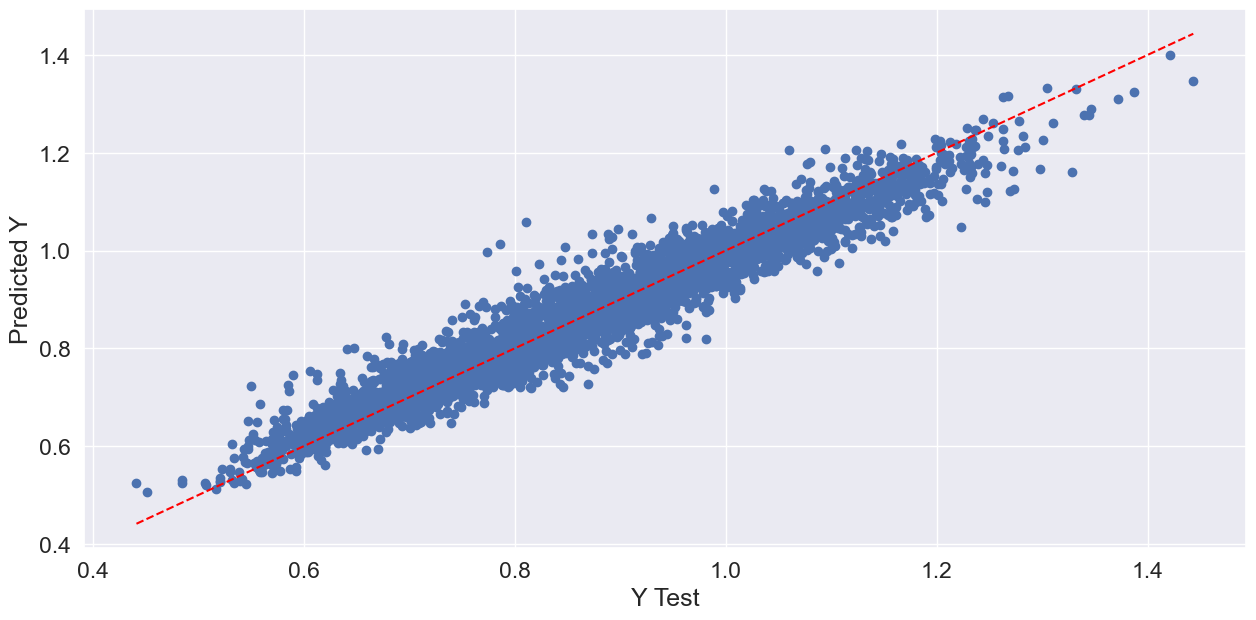

In [218]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(x=y_test, y=y_pred_xgr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Add a diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()


In [219]:
pip install lightgbm

In [221]:
#Lightgbm regressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor

pipe_lgbm = Pipeline([('scaler', StandardScaler()),('lgbm', LGBMRegressor())])

pipe_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lgbm.predict(X_test)

r2_lgbm = r2_score(y_test, y_pred_lgbm)
print("R2 score (LightGBM):", r2_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print("RMSE score (LightGBM):", rmse_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print("MAE score (LightGBM):", mae_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1510
[LightGBM] [Info] Number of data points in the train set: 19352, number of used features: 69
[LightGBM] [Info] Start training from score 0.870057
R2 score (LightGBM): 0.9146949692447813
RMSE score (LightGBM): 0.046053775758959706
MAE score (LightGBM): 0.034751066734971046


In [222]:
from sklearn.ensemble import BaggingRegressor

# Create a pipeline with BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

pipe_bagging = Pipeline([('scaler', StandardScaler()), ('bagging', BaggingRegressor())])
pipe_bagging.fit(X_train, y_train)
y_pred_bagging = pipe_bagging.predict(X_test)

# Calculate R2 score
r2_bagging = r2_score(y_test, y_pred_bagging)
print("R2 score for BaggingRegressor:", r2_bagging)
mse=mean_squared_error(y_test, y_pred_bagging)
print("MSE for BaggingRegressor:", mse)
mae=mean_absolute_error(y_test, y_pred_bagging)
print("MAE for BaggingRegressor:", mae)

R2 score for BaggingRegressor: 0.9273157272468787
MSE for BaggingRegressor: 0.0018071586862960867
MAE for BaggingRegressor: 0.030547149881334147


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define base regressor
base_regressor = DecisionTreeRegressor()

# Create Bagging Regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions
predictions = bagging_regressor.predict(X_test)


In [223]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, mae_rf, r2_rf

(0.04010355098387996, 0.02867913091785204, 0.9353140712504584)

Text(0.5, 1.0, 'plot for residuals')

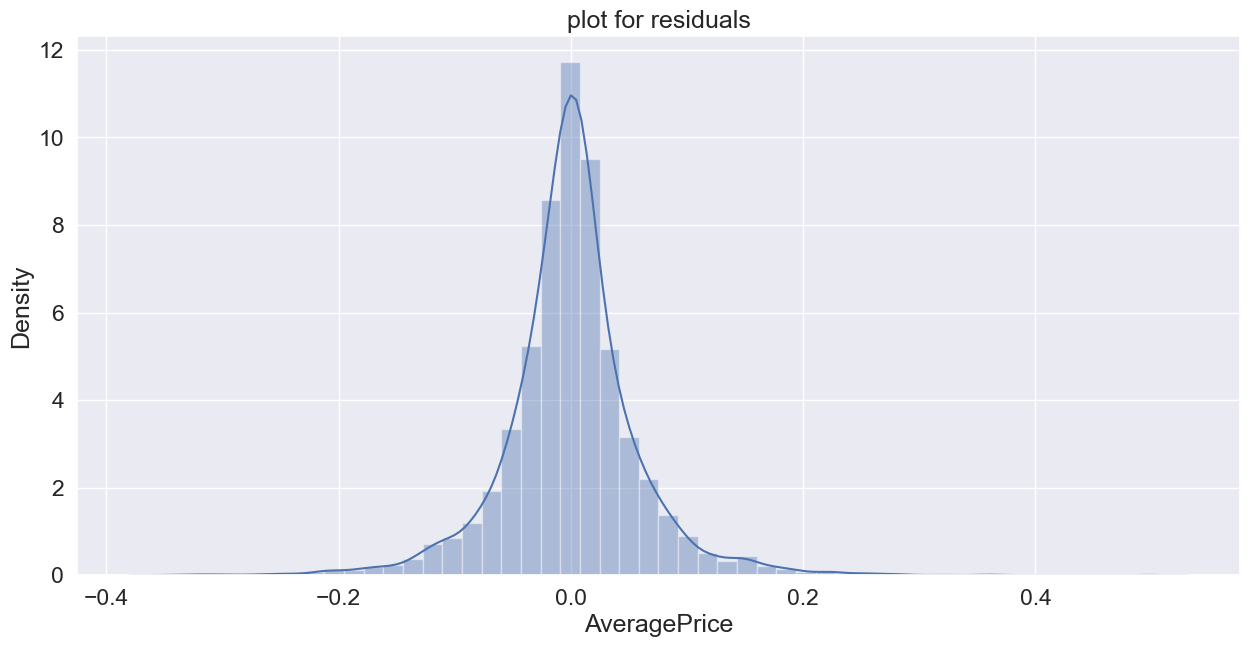

In [224]:
sns.distplot((y_test-pred),bins=50)
plt.title('plot for residuals')

In [225]:
#Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

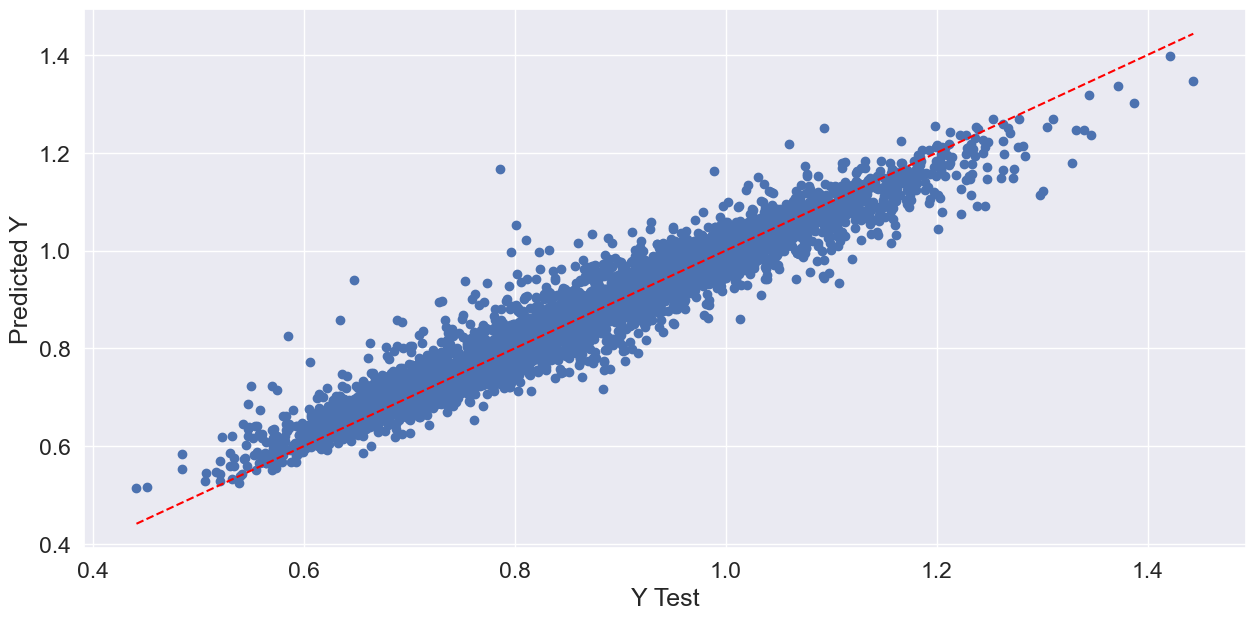

In [226]:
plt.scatter(x=y_test,y=y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

Y Test      Pred
16800  0.618418  0.698479
22633  0.885816  0.915250
5115   0.927398  0.930592
15462  0.961368  0.935254
10001  1.151134  1.148243

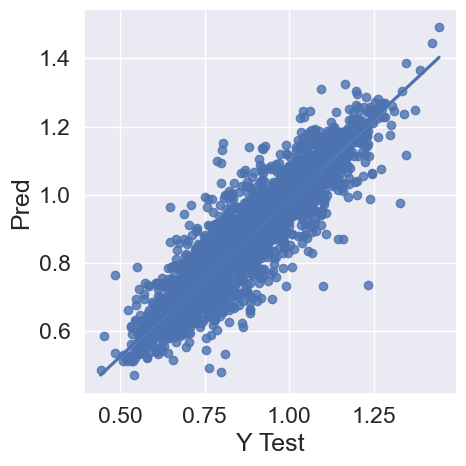

In [227]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()


In [228]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import joblib 

In [242]:
parameters={'n_estimators':range(1,45)}
gridsearch=GridSearchCV(rf_model,parameters)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'n_estimators': 43}

In [229]:
pipeline = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(n_estimators=100))

In [230]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}


In [231]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [232]:
clf.score(X_train, y_train)

0.9903657297476242

In [233]:
pred = clf.predict(X_test)
mean_squared_error(y_test, pred)

0.0016347384816480536

In [234]:
r2_score(y_test, pred) 

0.9342505013084043

In [235]:
#we can see from the results that even though our rmse has reduced which is sign of a good model, our r2 score has reduced from earlier so model without hypertuning is better. 

In [236]:
#Extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

pipe_et = Pipeline([('scaler', StandardScaler()),('et', ExtraTreesRegressor()) ])
pipe_et.fit(X_train, y_train)
y_pred_et = pipe_et.predict(X_test)

r2 = r2_score(y_test, y_pred_et)
print("R2 score:", r2)

R2 score: 0.9584865831730911


In [237]:
rmse_et=mean_squared_error(y_test, y_pred_et)
rmse_et

0.001032153572911092

In [240]:
mae_et=mean_absolute_error(y_test, y_pred_et)
mae_et

0.02300489214450143

In [261]:
from sklearn.model_selection import cross_val_score
import numpy as np

def check_overfitting(pipe_et, X, y, cv=5):
    """
    Function to check if a model is overfitting using cross-validation.
    
    Parameters:
    model : scikit-learn estimator
        The machine learning model to evaluate.
    X : array-like, shape (n_samples, n_features)
        The input samples.
    y : array-like, shape (n_samples,)
        The target values.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        
    Returns:
    train_score : float
        Mean training score across all cross-validation folds.
    test_score : float
        Mean test score across all cross-validation folds.
    """
    # Calculate training scores
    train_scores = cross_val_score(pipe_et, X, y, cv=cv, scoring='r2')
    train_score = np.mean(train_scores)
    
    # Fit the model to the entire training set
    pipe_et.fit(X, y)
    
    # Calculate test score using the entire dataset
    test_score = pipe_et.score(X, y)
    
    return train_score, test_score

# Usage example:
# Assuming you have a trained model `model` and your training data `X_train`, `y_train`
# You can call the function like this:
train_score, test_score = check_overfitting(pipe_et, X_train, y_train)
print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9497562089429487
Test Score: 1.0


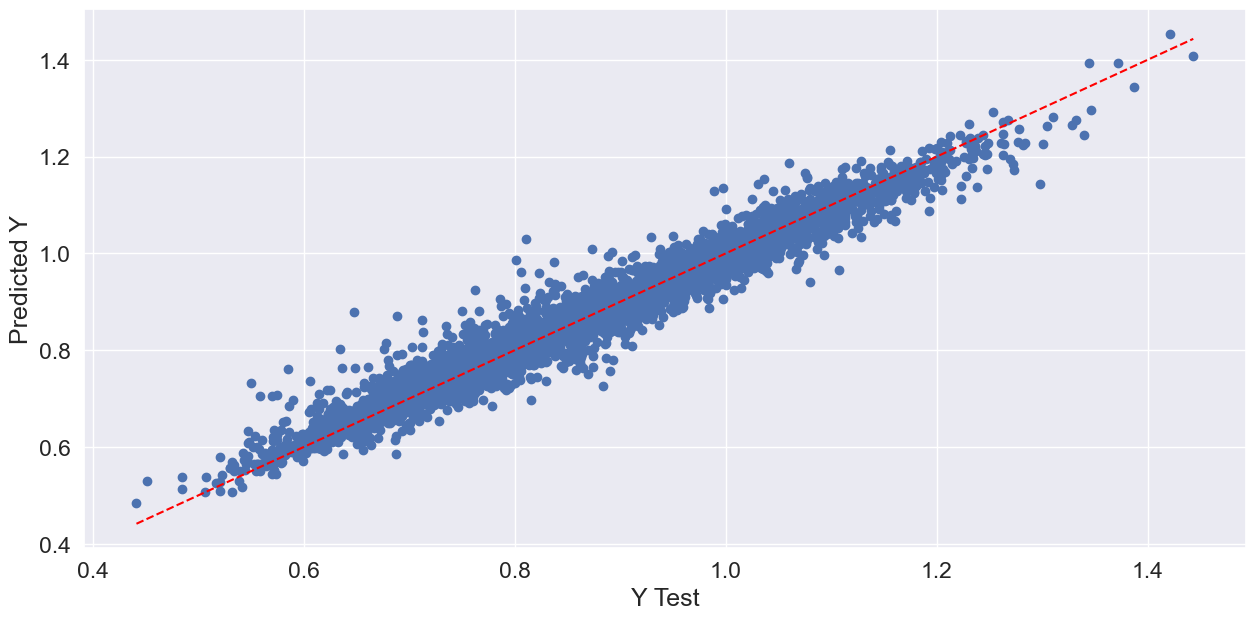

In [238]:
plt.scatter(x=y_test,y=y_pred_et)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

In [243]:
#Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         ExtraTreesRegressor(n_estimators=100))
#Declare hyperparameters to tune
hyperparameters = { 'extratreesregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'extratreesregressor__max_depth': [None, 5, 3, 1]}
#Tune model using cross-validation pipeline
cle= GridSearchCV(pipeline, hyperparameters, cv=10)
cle.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('extratreesregressor',
                                        ExtraTreesRegressor())]),
             param_grid={'extratreesregressor__max_depth': [None, 5, 3, 1],
                         'extratreesregressor__max_features': ['auto', 'sqrt',
                                                               'log2']})

In [244]:
#Perfomance on train data
cle.score(X_train, y_train)

1.0

In [245]:
pred = cle.predict(X_test)
metrics.mean_squared_error(y_test, pred)

0.0013036763501157024

In [246]:
r2_score(y_test, pred)

0.9475658844283261

In [247]:
cle.score(X_test, y_test)

0.9475658844283261

In [251]:
from sklearn.model_selection import cross_val_score
import numpy as np

def check_overfitting(rf_model, X, y, cv=5):
    """
    Function to check if a model is overfitting using cross-validation.
    
    Parameters:
    model : scikit-learn estimator
        The machine learning model to evaluate.
    X : array-like, shape (n_samples, n_features)
        The input samples.
    y : array-like, shape (n_samples,)
        The target values.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        
    Returns:
    train_score : float
        Mean training score across all cross-validation folds.
    test_score : float
        Mean test score across all cross-validation folds.
    """
    # Calculate training scores
    train_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='r2')
    train_score = np.mean(train_scores)
    
    # Fit the model to the entire training set
    rf_model.fit(X, y)
    
    # Calculate test score using the entire dataset
    test_score = rf_model.score(X, y)
    
    return train_score, test_score

# Usage example:
# Assuming you have a trained model `model` and your training data `X_train`, `y_train`
# You can call the function like this:
train_score, test_score = check_overfitting(rf_model, X_train, y_train)
print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9274824279169879
Test Score: 0.9907499675132422


In [257]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def evaluate_model(rf_model, X_train, y_train, X_val, y_val):
    """
    Evaluate a model's performance on training and validation sets.
    
    Parameters:
    model : scikit-learn estimator
        The machine learning model to evaluate.
    X_train : array-like, shape (n_samples, n_features)
        The training input samples.
    y_train : array-like, shape (n_samples,)
        The training target values.
    X_val : array-like, shape (n_samples, n_features)
        The validation input samples.
    y_val : array-like, shape (n_samples,)
        The validation target values.
        
    Returns:
    train_score : float
        Performance metric (e.g., accuracy) on the training set.
    val_score : float
        Performance metric (e.g., accuracy) on the validation set.
    """
    # Fit the model to the training data
    rf_model.fit(X_train, y_train)
    
    # Predictions on training and validation sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    
    # Calculate performance metrics
    train_score = accuracy_score(y_train, y_train_pred)  # Change this metric based on your problem
    val_score = accuracy_score(y_val, y_val_pred)  # Change this metric based on your problem
    
    return train_score, val_score

def plot_learning_curves(train_scores, val_scores):
    """
    Plot learning curves showing model performance on training and validation sets.
    
    Parameters:
    train_scores : list
        List of training scores obtained at each iteration.
    val_scores : list
        List of validation scores obtained at each iteration.
    """
    iterations = range(1, len(train_scores) + 1)
    
    plt.plot(iterations, train_scores, label='Training Set')
    plt.plot(iterations, val_scores, label='Validation Set')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')  # Change this label based on your problem
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

# Usage example:
# Assuming you have a trained model `model` and your training and validation data `X_train`, `y_train`, `X_val`, `y_val`



In [260]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(train_scores, val_scores):
    """
    Plot learning curves showing model performance on training and validation sets.
    
    Parameters:
    train_scores : list
        List of training scores obtained at each iteration.
    val_scores : list
        List of validation scores obtained at each iteration.
    """
    iterations = range(1, len(train_scores) + 1)
    
    plt.plot(iterations, train_scores, label='Training Set')
    plt.plot(iterations, val_scores, label='Validation Set')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')  # Change this label based on your problem
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

# Example usage:
# Assuming train_scores and val_scores are lists containing accuracy scores at each iteration
# plot_learning_curves(train_scores, val_scores)



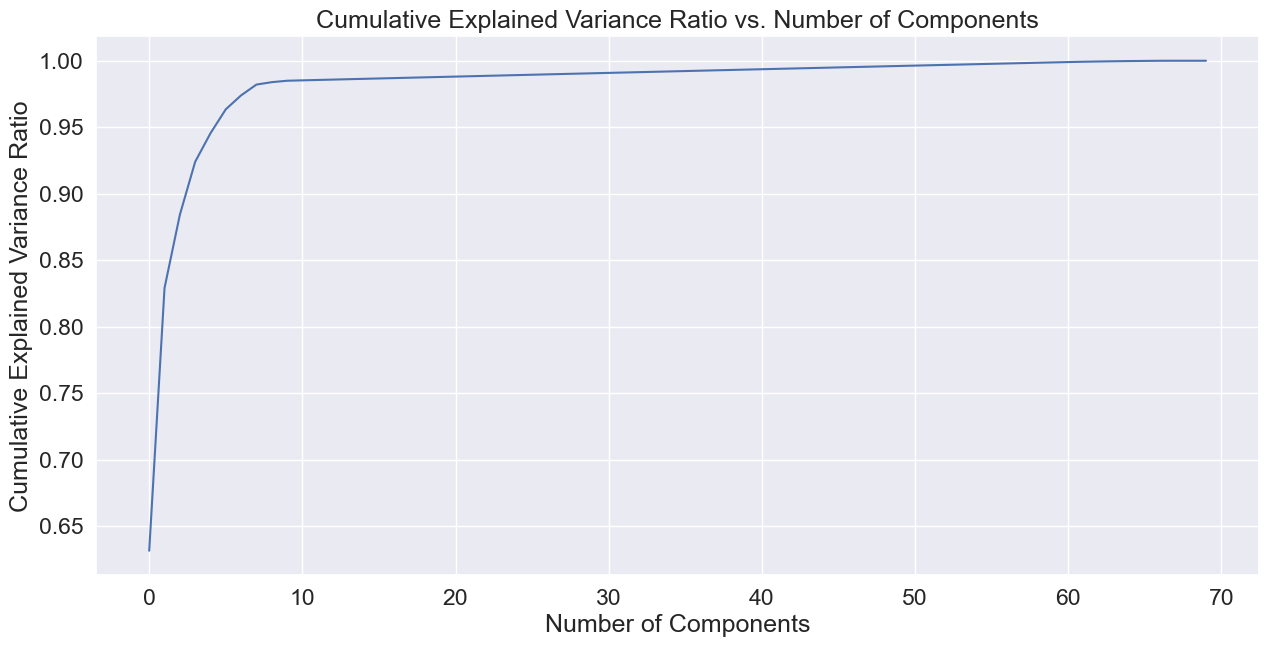

In [266]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA and get explained variance ratio
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.show()


In [555]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the pipeline with PCA and the regressor
pipe = make_pipeline(StandardScaler(), PCA(), ExtraTreesRegressor())

# Define the parameter grid
param_grid = {'pca__n_components': [1, 2, 3, 4, 5,6]}  # Adjust the range as needed

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=6, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best number of components
best_n_components = grid_search.best_params_['pca__n_components']
print("Best Number of Components:", best_n_components)


Best Number of Components: 6


In [556]:
pd.DataFrame(pipe_et['et'].feature_importances_, index=X_train.columns, columns=['Feature Importances'])

Feature Importances
const                               0.000000
Total_volume                        0.025569
Small_Hass                          0.016723
Large_Hass                          0.032482
Extra_large_hass                    0.009239
...                                      ...
region_Toledo                       0.001076
region_TotalUS                      0.000233
region_West                         0.001357
region_WestTexNewMexico             0.009752
region_Wichita                      0.003212

[70 rows x 1 columns]

In [557]:
x = df[['Total_volume', 'Total_bags', 'Year', 'type_organic','Day']]

In [558]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(pca.fit_transform(x), y, test_size=0.33, random_state=0)

from sklearn.ensemble import ExtraTreesRegressor

pipe3 = Pipeline([('scaler', StandardScaler()), ('et', ExtraTreesRegressor())])
pipe3.fit(X_train_cut, y_train_cut)
y_pred3 = pipe3.predict(X_test_cut)
mse_pc=mean_squared_error(y_test_cut, y_pred3)
r2_pc=r2_score(y_test_cut, y_pred3)
r2_pc

0.664555407719043

In [559]:
mse_pc

0.008334947008641794

In [560]:
results=pd.DataFrame({'Model':['Multiple linear regressor','KNeighbors regressor','Decision tree regressor','Adaboost regressor','Gradient Boosting regressor','XG boosting regressor','Light Gradient Boosting regressor','Random Forest regressor','Bagging Regressor','Extra Tree Regressor','PCA regressor'],
                    'RMSE':[rmse_lr,rmse_knn,rmse_dt,rmse_ada,rmse_gb,rmse_xgr,rmse_lgbm,rmse_rf,mse,rmse_et,mse_pc],
                     'R2_score' : [r2_lr,r2_knn,r2_dt,r2_ada,r2_gb,r2_xgr,r2_lgbm,r2_rf,r2_bagging,r2,r2_pc]})
result_df=results.sort_values(by='R2_score', ascending=False)
result_df=result_df.set_index('Model')
result_df

RMSE  R2_score
Model                                                
Extra Tree Regressor               0.001027  0.958677
XG boosting regressor              0.039458  0.937379
Random Forest regressor            0.040104  0.935314
Bagging Regressor                  0.001859  0.925213
Light Gradient Boosting regressor  0.046054  0.914695
KNeighbors regressor               0.052024  0.891143
Decision tree regressor            0.057850  0.865398
Gradient Boosting regressor        0.069710  0.804552
Multiple linear regressor          0.076091  0.767131
PCA regressor                      0.008335  0.664555
Adaboost regressor                 0.094347  0.641985